## Lab 1 - BFS & DFS

### BFS

In [1]:
def BFS(m, nod_start, nod_scop):
    frontiera = [nod_start]
    parcurse = set()
    solutii = 0  # retinem cate solutii am gasit
    nr_sol = len(nod_scop)  # retinem cate solutii trebuie sa gasim
    
    # Dictionary to track parent nodes for path reconstruction
    parinti = {nod_start: None}
    
    print("Frontiera: ", frontiera)
    print("Parcurse: ", parcurse)
    
    while len(frontiera):
        n = frontiera.pop(0)  # eliminam nodul curent din frontiera - coada
        parcurse.add(n)
        print("Nod curent: ", n)
        
        if n in nod_scop:
            solutii = solutii + 1
            print(f"Solutie #{solutii} gasita: {n}")
            
            # Reconstruct and display the path
            path = []
            current = n
            while current is not None:
                path.insert(0, current)  # Add to beginning of path
                current = parinti[current]
            
            print("Drumul este:", " -> ".join(map(str, path)))
            print(f"Lungimea drumului: {len(path) - 1} arce")
            
            if solutii == nr_sol:
                return path  # Return the path to the goal
        
        for i in range(len(m)):
            next_node = i + 1  # Nodurile sunt indexate de la 1
            # verificam daca exista arc si daca nodul nu a mai fost parcurs
            if m[n - 1][i] != 0 and next_node not in parcurse and next_node not in frontiera:
                frontiera.append(next_node)
                parinti[next_node] = n  # Record the parent of the next node
        
        print("Frontiera: ", frontiera)
        print("Parcurse: ", parcurse)
    
    if solutii == 0:
        print("Nu s-a gasit nicio solutie!")
        return []
    return []  # Return empty list if no solution is found

# Date de test
m = [[0, 0, 1, 0, 1, 0],
     [1, 0, 1, 0, 0, 0],
     [0, 1, 0, 1, 0, 1],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]
     ]
nod_start = 2
nod_scop = [6]

# Apel
path = BFS(m, nod_start, nod_scop)
if path:
    print(f"\nDrumul final de la {nod_start} la {nod_scop[0]}: {' -> '.join(map(str, path))}")

Frontiera:  [2]
Parcurse:  set()
Nod curent:  2
Frontiera:  [1, 3]
Parcurse:  {2}
Nod curent:  1
Frontiera:  [3, 5]
Parcurse:  {1, 2}
Nod curent:  3
Frontiera:  [5, 4, 6]
Parcurse:  {1, 2, 3}
Nod curent:  5
Frontiera:  [4, 6]
Parcurse:  {1, 2, 3, 5}
Nod curent:  4
Frontiera:  [6]
Parcurse:  {1, 2, 3, 4, 5}
Nod curent:  6
Solutie #1 gasita: 6
Drumul este: 2 -> 3 -> 6
Lungimea drumului: 2 arce

Drumul final de la 2 la 6: 2 -> 3 -> 6


Better visualisation

BFS visualization saved to bfs_solution_tree.png


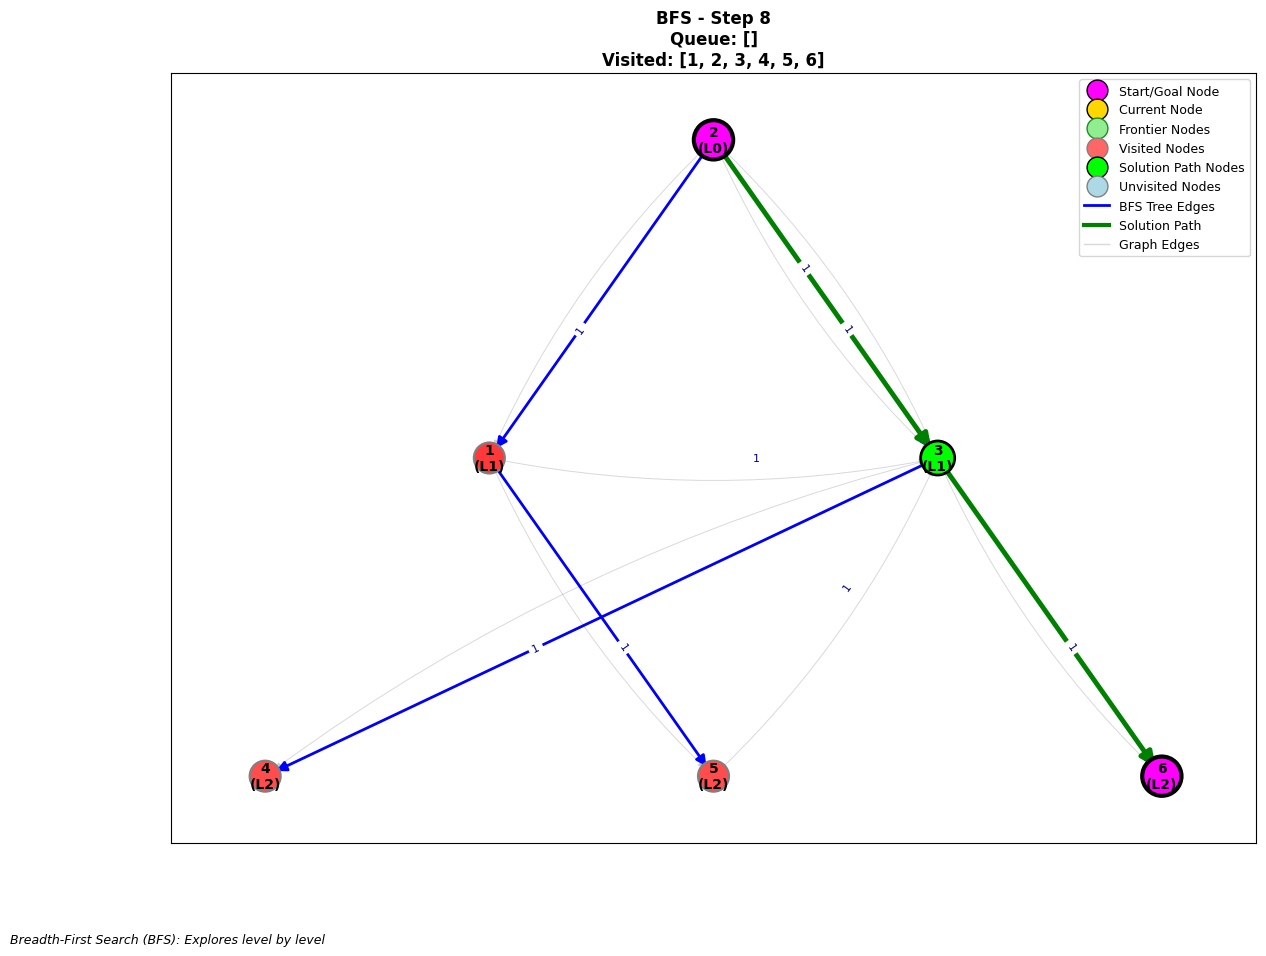


Drumul final de la 2 la 6: 2 -> 3 -> 6


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, clear_output
import time
from collections import deque

def create_bfs_tree_layout(m, start_node, parinti):
    """Create a hierarchical tree layout based on BFS levels"""
    # Create a tree based on parent relationships
    tree = nx.DiGraph()
    
    # Add all nodes first
    for i in range(len(m)):
        tree.add_node(i+1)
    
    # Add edges based on parent relationships
    for child, parent in parinti.items():
        if parent is not None:
            tree.add_edge(parent, child)
    
    # Compute BFS levels directly
    levels = {start_node: 0}
    queue = deque([start_node])
    visited = {start_node}
    
    while queue:
        node = queue.popleft()
        for child in tree.successors(node):
            if child not in visited:
                visited.add(child)
                levels[child] = levels[node] + 1
                queue.append(child)
    
    # For nodes not in the tree, assign default level
    for i in range(1, len(m)+1):
        if i not in levels:
            levels[i] = 0
    
    # Group nodes by level
    nodes_by_level = {}
    for node, level in levels.items():
        if level not in nodes_by_level:
            nodes_by_level[level] = []
        nodes_by_level[level].append(node)
    
    # Sort nodes within each level for consistent layout
    for level in nodes_by_level:
        nodes_by_level[level].sort()
    
    # Position nodes by level in a classic tree layout
    pos = {}
    max_level = max(levels.values()) if levels else 0
    y_spacing = 1.0
    
    for level in range(max_level + 1):
        nodes = nodes_by_level.get(level, [])
        level_width = len(nodes)
        if level_width == 0:
            continue
            
        x_spacing = 1.5
        total_width = level_width * x_spacing
        start_x = -total_width / 2
        
        for i, node in enumerate(nodes):
            pos[node] = (start_x + i * x_spacing, -level * y_spacing * 1.5)
    
    # Position remaining nodes at the bottom
    remaining_nodes = [i+1 for i in range(len(m)) if i+1 not in pos]
    if remaining_nodes:
        x_spacing = 1.0
        total_width = len(remaining_nodes) * x_spacing
        start_x = -total_width / 2
        
        for i, node in enumerate(remaining_nodes):
            pos[node] = (start_x + i * x_spacing, -(max_level + 1) * y_spacing * 1.5)
    
    return pos

def visualize_bfs_graph(m, frontiera, parcurse, nod_curent=None, path=None, step_num=0, save_path=None, parinti=None):
    plt.figure(figsize=(14, 10))
    
    # Create directed graph
    G = nx.DiGraph()
    
    # Add nodes
    for i in range(len(m)):
        G.add_node(i+1)
    
    # Add edges
    for i in range(len(m)):
        for j in range(len(m)):
            if m[i][j] != 0:
                G.add_edge(i+1, j+1)
    
    # Get BFS tree layout
    if parinti:
        pos = create_bfs_tree_layout(m, list(parinti.keys())[0], parinti)
    else:
        pos = nx.spring_layout(G, seed=42)
    
    # Create separate graph for tree edges
    tree_edges = []
    if parinti:
        for child, parent in parinti.items():
            if parent is not None:
                tree_edges.append((parent, child))
    
    # Prepare node colors and sizes based on their status
    node_colors = []
    node_sizes = []
    node_borders = []
    border_widths = []
    
    # Determine BFS levels for gradient coloring
    levels = {}
    if parinti:
        queue = deque([list(parinti.keys())[0]])
        levels[list(parinti.keys())[0]] = 0
        visited = set([list(parinti.keys())[0]])
        
        while queue:
            node = queue.popleft()
            for i in range(len(m)):
                next_node = i + 1
                if m[node-1][i] != 0 and next_node in parinti and parinti[next_node] == node:
                    if next_node not in visited:
                        visited.add(next_node)
                        levels[next_node] = levels[node] + 1
                        queue.append(next_node)
    
    # Color nodes based on their status
    for node in sorted(G.nodes()):
        if path and node in path:
            if node == path[0] or node == path[-1]:
                node_colors.append('#FF00FF')  # Magenta for start/goal
                node_sizes.append(800)
                node_borders.append('black')
                border_widths.append(3)
            else:
                node_colors.append('#00FF00')  # Bright green for solution path
                node_sizes.append(600)
                node_borders.append('black')
                border_widths.append(2)
        elif node == nod_curent:
            node_colors.append('#FFD700')  # Gold for current node
            node_sizes.append(700)
            node_borders.append('black')
            border_widths.append(2.5)
        elif node in parcurse:
            # Use gradient of red based on level if available
            level = levels.get(node, 0) if levels else 0
            max_level = max(levels.values()) if levels else 0
            if max_level > 0:
                intensity = 0.5 + 0.5 * (level / max_level)
                node_colors.append((1.0, 0.3 * intensity, 0.3 * intensity))  # Red gradient
            else:
                node_colors.append('#FF6666')  # Default red for visited
            node_sizes.append(500)
            node_borders.append('gray')
            border_widths.append(1.5)
        elif node in frontiera:
            node_colors.append('#90EE90')  # Light green for frontier
            node_sizes.append(500)
            node_borders.append('#228B22')  # Forest green border
            border_widths.append(2)
        else:
            node_colors.append('#ADD8E6')  # Light blue for unvisited
            node_sizes.append(400)
            node_borders.append('gray')
            border_widths.append(1)
    
    # Draw nodes with custom borders
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, 
                          edgecolors=node_borders, linewidths=border_widths)
    
    # Draw all graph edges (light gray, curved)
    nx.draw_networkx_edges(G, pos, width=0.7, alpha=0.3, edge_color='gray',
                          connectionstyle='arc3,rad=0.1')
    
    # Draw tree structure edges (blue)
    if tree_edges:
        tree_graph = nx.DiGraph()
        tree_graph.add_edges_from(tree_edges)
        nx.draw_networkx_edges(tree_graph, pos, width=2, edge_color='blue',
                              connectionstyle='arc3,rad=0.0', arrowsize=15)
    
    # Draw solution path if found (green)
    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        path_graph = nx.DiGraph()
        path_graph.add_edges_from(path_edges)
        nx.draw_networkx_edges(path_graph, pos, width=3.5, edge_color='green',
                              connectionstyle='arc3,rad=0.0', arrowsize=20)
    
    # Add node labels with level information if available
    labels = {}
    for node in G.nodes():
        if node in levels:
            labels[node] = f"{node}\n(L{levels[node]})"
        else:
            labels[node] = f"{node}"
    
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold')
    
    # Add edge labels showing costs if applicable
    edge_labels = {}
    for i in range(len(m)):
        for j in range(len(m)):
            if m[i][j] != 0:
                edge_labels[(i+1, j+1)] = m[i][j]
    
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8,
                                    font_color='darkblue', label_pos=0.6)
    
    # Create a legend with custom colors and markers
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF00FF', markeredgecolor='black',
                  markersize=15, label='Start/Goal Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FFD700', markeredgecolor='black',
                  markersize=15, label='Current Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#90EE90', markeredgecolor='#228B22',
                  markersize=15, label='Frontier Nodes'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF6666', markeredgecolor='gray',
                  markersize=15, label='Visited Nodes'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#00FF00', markeredgecolor='black',
                  markersize=15, label='Solution Path Nodes'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ADD8E6', markeredgecolor='gray',
                  markersize=15, label='Unvisited Nodes'),
        plt.Line2D([0], [0], color='blue', lw=2, label='BFS Tree Edges'),
        plt.Line2D([0], [0], color='green', lw=3, label='Solution Path'),
        plt.Line2D([0], [0], color='gray', lw=1, alpha=0.3, label='Graph Edges')
    ]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=9)
    
    # Add BFS-specific title with queue information
    plt.title(f"BFS - Step {step_num}\nQueue: {frontiera}\nVisited: {sorted(list(parcurse))}", 
             fontsize=12, fontweight='bold')
    
    # Add a subtle grid for better readability
    plt.grid(False)
    
    # Add algorithm info
    plt.figtext(0.01, 0.01, "Breadth-First Search (BFS): Explores level by level", 
                fontsize=9, style='italic')
    
    # Save the figure if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"BFS visualization saved to {save_path}")
    
    # Display
    display(plt.gcf())
    
    # Close figure if not saving
    if not save_path:
        clear_output(wait=True)
    plt.close()
    
    time.sleep(0.5)  # Pause to see the visualization

def BFS(m, nod_start, nod_scop):
    frontiera = [nod_start]
    parcurse = set()
    solutii = 0  # retinem cate solutii am gasit
    nr_sol = len(nod_scop)  # retinem cate solutii trebuie sa gasim
    step_count = 0
    
    # Dictionary to track parent nodes for path reconstruction
    parinti = {nod_start: None}
    
    print("Frontiera: ", frontiera)
    print("Parcurse: ", parcurse)
    
    # Visualize initial state
    visualize_bfs_graph(m, frontiera, parcurse, step_num=step_count, parinti=parinti)
    step_count += 1
    
    while len(frontiera):
        n = frontiera.pop(0)  # eliminam nodul curent din frontiera - coada (FIFO)
        parcurse.add(n)
        print("Nod curent: ", n)
        
        # Visualize current state
        visualize_bfs_graph(m, frontiera, parcurse, nod_curent=n, step_num=step_count, parinti=parinti)
        step_count += 1
        
        if n in nod_scop:
            solutii = solutii + 1
            print(f"Solutie #{solutii} gasita: {n}")
            
            # Reconstruct and display the path
            path = []
            current = n
            while current is not None:
                path.insert(0, current)  # Add to beginning of path
                current = parinti[current]
            
            print("Drumul este:", " -> ".join(map(str, path)))
            print(f"Lungimea drumului: {len(path) - 1} arce")
            
            # Visualize solution
            visualize_bfs_graph(m, frontiera, parcurse, nod_curent=n, path=path, 
                              step_num=step_count, parinti=parinti)
            step_count += 1
            
            if solutii == nr_sol:
                # Save final visualization
                visualize_bfs_graph(m, frontiera, parcurse, nod_curent=n, path=path, 
                                  step_num=step_count, save_path="bfs_solution_tree.png", parinti=parinti)
                return path  # Return the path to the goal
        
        for i in range(len(m)):
            next_node = i + 1  # Nodurile sunt indexate de la 1
            # verificam daca exista arc si daca nodul nu a mai fost parcurs sau adaugat in frontiera
            if m[n - 1][i] != 0 and next_node not in parcurse and next_node not in frontiera:
                frontiera.append(next_node)
                parinti[next_node] = n  # Record the parent of the next node
        
        print("Frontiera: ", frontiera)
        print("Parcurse: ", parcurse)
    
    if solutii == 0:
        print("Nu s-a gasit nicio solutie!")
        # Save final visualization even if no solution
        visualize_bfs_graph(m, frontiera, parcurse, step_num=step_count, 
                          save_path="bfs_no_solution_tree.png", parinti=parinti)
        return []
    return []  # Return empty list if no solution is found

# Date de test
m = [[0, 0, 1, 0, 1, 0],
     [1, 0, 1, 0, 0, 0],
     [0, 1, 0, 1, 0, 1],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]
     ]
nod_start = 2
nod_scop = [6]

# Apel
path = BFS(m, nod_start, nod_scop)
if path:
    print(f"\nDrumul final de la {nod_start} la {nod_scop[0]}: {' -> '.join(map(str, path))}")

# Create a larger test graph for better BFS visualization
def create_test_graph(size=10, connectivity=0.2):
    import random
    random.seed(42)  # For reproducibility
    
    # Create random adjacency matrix with given connectivity
    test_m = [[0 for _ in range(size)] for _ in range(size)]
    for i in range(size):
        for j in range(size):
            if i != j and random.random() < connectivity:
                test_m[i][j] = 1
    
    return test_m

# Uncomment to run with a larger test graph
# large_graph = create_test_graph(15, 0.15)
# start = 1
# goal = [15]
# large_path = BFS(large_graph, start, goal)

### DFS

In [3]:
def DFS(m, nod_start, nod_scop):
    frontiera = [nod_start]
    parcurse = set()
    solutii = 0  # retinem cate solutii am gasit
    nr_sol = len(nod_scop)  # retinem cate solutii trebuie sa gasim
    
    # Dictionary to track parent nodes for path reconstruction
    parinti = {nod_start: None}
    
    print("Frontiera: ", frontiera)
    print("Parcurse: ", parcurse)
    
    while len(frontiera):
        n = frontiera.pop()  # eliminam nodul curent din frontiera - stiva (LIFO)
        parcurse.add(n)
        print("Nod curent: ", n)
        
        if n in nod_scop:
            solutii = solutii + 1
            print(f"Solutie #{solutii} gasita: {n}")
            
            # Reconstruct and display the path
            path = []
            current = n
            while current is not None:
                path.insert(0, current)  # Add to beginning of path
                current = parinti[current]
            
            print("Drumul este:", " -> ".join(map(str, path)))
            print(f"Lungimea drumului: {len(path) - 1} arce")
            
            if solutii == nr_sol:
                return path  # Return the path to the goal
        
        # Iterate from right to left to explore leftmost paths last (so they're popped first)
        for i in range(len(m)-1, -1, -1):  # parcurgere de la dreapta la stanga in stiva
            next_node = i + 1  # Nodurile sunt indexate de la 1
            # verificam daca exista arc si daca nodul nu a mai fost parcurs sau adaugat in frontiera
            if m[n - 1][i] != 0 and next_node not in parcurse and next_node not in frontiera:
                frontiera.append(next_node)
                parinti[next_node] = n  # Record the parent of the next node
        
        print("Frontiera: ", frontiera)
        print("Parcurse: ", parcurse)
    
    if solutii == 0:
        print("Nu s-a gasit nicio solutie!")
        return []
    return []  # Return empty list if no solution is found

# Date de test
m = [[0, 0, 1, 0, 1, 0],
     [1, 0, 1, 0, 0, 0],
     [0, 1, 0, 1, 0, 1],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]
     ]
nod_start = 2
nod_scop = [6]

# Apel
path = DFS(m, nod_start, nod_scop)
if path:
    print(f"\nDrumul final de la {nod_start} la {nod_scop[0]}: {' -> '.join(map(str, path))}")

Frontiera:  [2]
Parcurse:  set()
Nod curent:  2
Frontiera:  [3, 1]
Parcurse:  {2}
Nod curent:  1
Frontiera:  [3, 5]
Parcurse:  {1, 2}
Nod curent:  5
Frontiera:  [3]
Parcurse:  {1, 2, 5}
Nod curent:  3
Frontiera:  [6, 4]
Parcurse:  {1, 2, 3, 5}
Nod curent:  4
Frontiera:  [6]
Parcurse:  {1, 2, 3, 4, 5}
Nod curent:  6
Solutie #1 gasita: 6
Drumul este: 2 -> 3 -> 6
Lungimea drumului: 2 arce

Drumul final de la 2 la 6: 2 -> 3 -> 6


Better visualisation

Visualization saved to dfs_solution_tree.png


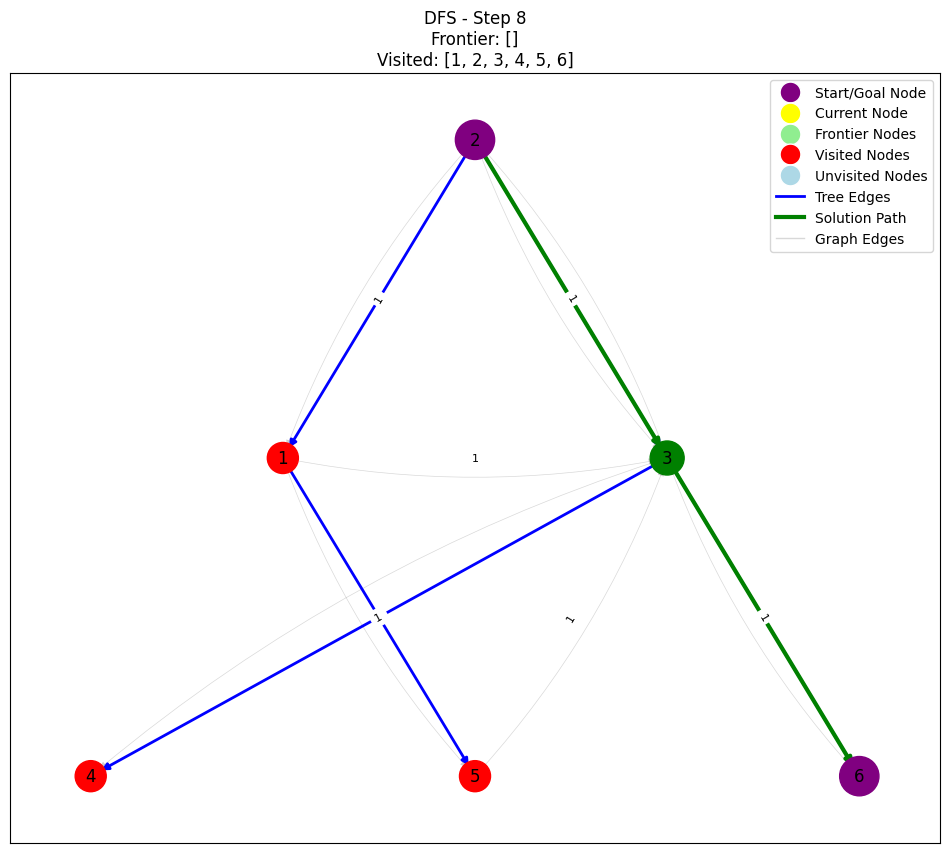


Drumul final de la 2 la 6: 2 -> 3 -> 6


In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, clear_output
import time
from collections import deque

def create_tree_layout(m, start_node, parinti):
    """Create a hierarchical tree layout based on DFS parent relationships"""
    # Create a tree based on parent relationships
    tree = nx.DiGraph()
    
    # Add all nodes first
    for i in range(len(m)):
        tree.add_node(i+1)
    
    # Add edges based on parent relationships
    for child, parent in parinti.items():
        if parent is not None:
            tree.add_edge(parent, child)
    
    # Compute node levels using BFS from start_node
    levels = {start_node: 0}
    queue = deque([start_node])
    visited = {start_node}
    
    while queue:
        node = queue.popleft()
        for child in tree.successors(node):
            if child not in visited:
                visited.add(child)
                levels[child] = levels[node] + 1
                queue.append(child)
    
    # For nodes not in the tree, assign default level
    for i in range(1, len(m)+1):
        if i not in levels:
            levels[i] = 0
    
    # Create positions: x based on in-order traversal, y based on level
    pos = {}
    
    # Group nodes by level
    nodes_by_level = {}
    for node, level in levels.items():
        if level not in nodes_by_level:
            nodes_by_level[level] = []
        nodes_by_level[level].append(node)
    
    # Sort nodes within each level
    for level in nodes_by_level:
        nodes_by_level[level].sort()
    
    # Position nodes by level
    max_level = max(levels.values()) if levels else 0
    x_spacing = 1.0
    
    for level in range(max_level + 1):
        nodes = nodes_by_level.get(level, [])
        level_width = len(nodes) * x_spacing
        start_x = -level_width / 2
        
        for i, node in enumerate(nodes):
            pos[node] = (start_x + i * x_spacing, -level)
    
    # Assign positions for remaining nodes
    remaining_nodes = [i+1 for i in range(len(m)) if i+1 not in pos]
    for i, node in enumerate(remaining_nodes):
        pos[node] = (i * x_spacing - len(remaining_nodes) * x_spacing / 2, -max_level - 1)
    
    return pos

def visualize_graph(m, frontiera, parcurse, nod_curent=None, path=None, step_num=0, save_path=None, parinti=None):
    plt.figure(figsize=(12, 10))
    
    # Create directed graph for the full graph structure
    G = nx.DiGraph()
    
    # Add nodes
    for i in range(len(m)):
        G.add_node(i+1)  # Nodes are 1-indexed
    
    # Add edges
    for i in range(len(m)):
        for j in range(len(m)):
            if m[i][j] != 0:
                G.add_edge(i+1, j+1)
    
    # Create tree visualization based on parent relationships
    if parinti:
        # Get tree-based positions
        pos = create_tree_layout(m, list(parinti.keys())[0], parinti)
    else:
        # Fallback to spring layout if no parents defined
        pos = nx.spring_layout(G, seed=42)
    
    # Create separate graph for tree edges
    tree_edges = []
    if parinti:
        for child, parent in parinti.items():
            if parent is not None:
                tree_edges.append((parent, child))
    
    # Prepare node colors and sizes
    node_colors = []
    node_sizes = []
    
    for node in sorted(G.nodes()):
        if path and node in path:
            if node == path[0] or node == path[-1]:
                node_colors.append('purple')  # Start/goal nodes in solution path
                node_sizes.append(800)
            else:
                node_colors.append('green')  # Nodes in solution path
                node_sizes.append(600)
        elif node == nod_curent:
            node_colors.append('yellow')  # Current node
            node_sizes.append(700)
        elif node in parcurse:
            node_colors.append('red')  # Visited nodes
            node_sizes.append(500)
        elif node in frontiera:
            node_colors.append('lightgreen')  # Nodes in frontier
            node_sizes.append(500)
        else:
            node_colors.append('lightblue')  # Unvisited nodes
            node_sizes.append(400)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
    
    # Draw original graph edges (thin, light gray)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3, edge_color='gray', 
                          connectionstyle='arc3,rad=0.1')
    
    # Draw tree structure edges (thicker, dark blue)
    tree_graph = nx.DiGraph()
    tree_graph.add_edges_from(tree_edges)
    nx.draw_networkx_edges(tree_graph, pos, width=2, edge_color='blue', 
                          connectionstyle='arc3,rad=0.0')
    
    # Draw solution path if found
    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        path_graph = nx.DiGraph()
        path_graph.add_edges_from(path_edges)
        nx.draw_networkx_edges(path_graph, pos, width=3, edge_color='green',
                              connectionstyle='arc3,rad=0.0')
    
    # Add node labels
    nx.draw_networkx_labels(G, pos)
    
    # Add edge labels showing costs if applicable
    edge_labels = {}
    for i in range(len(m)):
        for j in range(len(m)):
            if m[i][j] != 0:
                edge_labels[(i+1, j+1)] = m[i][j]
    
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    
    # Create legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=15, label='Start/Goal Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=15, label='Current Node'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=15, label='Frontier Nodes'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=15, label='Visited Nodes'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=15, label='Unvisited Nodes'),
        plt.Line2D([0], [0], color='blue', lw=2, label='Tree Edges'),
        plt.Line2D([0], [0], color='green', lw=3, label='Solution Path'),
        plt.Line2D([0], [0], color='gray', lw=1, alpha=0.3, label='Graph Edges')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    # Set title
    plt.title(f"DFS - Step {step_num}\nFrontier: {frontiera}\nVisited: {sorted(list(parcurse))}")
    
    # Add grid for better visualization
    plt.grid(False)
    
    # Save the figure if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Visualization saved to {save_path}")
    
    # Display
    display(plt.gcf())
    
    # Close figure if not saving
    if not save_path:
        clear_output(wait=True)
    plt.close()
    
    time.sleep(0.5)  # Pause to see the visualization

def DFS(m, nod_start, nod_scop):
    frontiera = [nod_start]
    parcurse = set()
    solutii = 0  # retinem cate solutii am gasit
    nr_sol = len(nod_scop)  # retinem cate solutii trebuie sa gasim
    step_count = 0
    
    # Dictionary to track parent nodes for path reconstruction
    parinti = {nod_start: None}
    
    print("Frontiera: ", frontiera)
    print("Parcurse: ", parcurse)
    
    # Visualize initial state
    visualize_graph(m, frontiera, parcurse, step_num=step_count, parinti=parinti)
    step_count += 1
    
    while len(frontiera):
        n = frontiera.pop()  # eliminam nodul curent din frontiera - stiva (LIFO)
        parcurse.add(n)
        print("Nod curent: ", n)
        
        # Visualize current state
        visualize_graph(m, frontiera, parcurse, nod_curent=n, step_num=step_count, parinti=parinti)
        step_count += 1
        
        if n in nod_scop:
            solutii = solutii + 1
            print(f"Solutie #{solutii} gasita: {n}")
            
            # Reconstruct and display the path
            path = []
            current = n
            while current is not None:
                path.insert(0, current)  # Add to beginning of path
                current = parinti[current]
            
            print("Drumul este:", " -> ".join(map(str, path)))
            print(f"Lungimea drumului: {len(path) - 1} arce")
            
            # Visualize solution
            visualize_graph(m, frontiera, parcurse, nod_curent=n, path=path, step_num=step_count, parinti=parinti)
            step_count += 1
            
            if solutii == nr_sol:
                # Save final visualization
                visualize_graph(m, frontiera, parcurse, nod_curent=n, path=path, 
                               step_num=step_count, save_path="dfs_solution_tree.png", parinti=parinti)
                return path  # Return the path to the goal
        
        # Iterate from right to left to explore leftmost paths last (so they're popped first)
        for i in range(len(m)-1, -1, -1):  # parcurgere de la dreapta la stanga in stiva
            next_node = i + 1  # Nodurile sunt indexate de la 1
            # verificam daca exista arc si daca nodul nu a mai fost parcurs sau adaugat in frontiera
            if m[n - 1][i] != 0 and next_node not in parcurse and next_node not in frontiera:
                frontiera.append(next_node)
                parinti[next_node] = n  # Record the parent of the next node
        
        print("Frontiera: ", frontiera)
        print("Parcurse: ", parcurse)
    
    if solutii == 0:
        print("Nu s-a gasit nicio solutie!")
        # Save final visualization even if no solution
        visualize_graph(m, frontiera, parcurse, step_num=step_count, 
                       save_path="dfs_no_solution_tree.png", parinti=parinti)
        return []
    return []  # Return empty list if no solution is found

# Date de test
m = [[0, 0, 1, 0, 1, 0],
     [1, 0, 1, 0, 0, 0],
     [0, 1, 0, 1, 0, 1],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]
     ]
nod_start = 2
nod_scop = [6]

# Apel
path = DFS(m, nod_start, nod_scop)
if path:
    print(f"\nDrumul final de la {nod_start} la {nod_scop[0]}: {' -> '.join(map(str, path))}")

# Create a larger test graph for better tree visualization
def create_test_graph(size=10, connectivity=0.2):
    import random
    random.seed(42)  # For reproducibility
    
    # Create random adjacency matrix with given connectivity
    test_m = [[0 for _ in range(size)] for _ in range(size)]
    for i in range(size):
        for j in range(size):
            if i != j and random.random() < connectivity:
                test_m[i][j] = 1
    
    return test_m

# Uncomment to run with a larger test graph for better tree visualization
# large_graph = create_test_graph(12, 0.15)
# start = 1
# goal = [12]
# large_path = DFS(large_graph, start, goal)

## Lab 2 - A*

In [5]:
import numpy as np

# this function makes a  priority_queue sorted by the second number from element
# element is composed by (node_name, heuristic, cost)
# value(node) = cost(node) + heuristic(node)
def insert_into_priority_queue(element, priority_queue):
    if len(priority_queue) == 0:
        priority_queue.append(element)
    else:
        current_element = priority_queue[0]
        i = 0
        while current_element[1]+current_element[2] <= element[1]+element[2]:
            if current_element[1]+current_element[2] == element[1]+element[2] and element[2] > current_element[2]:
                break
            i = i + 1
            if i >= len(priority_queue):
                break
            current_element = priority_queue[i]
        priority_queue.insert(i, element)

# this function verify if node is in open
# node is composed by (node_name, value)
def is_in_open(node, open):
    for i in open:
        if i[0] == node:
            return True
    return False

# this function shows the road from the root of the three to the node
def show_road(tree, node):
    print("     The road is: ")
    list = []
    k = node
    # we ar using a tree of parents where the value is the parent of the key
    # eg. tree[k][0] is the parent of k
    while k is not None:
        list.append(k)
        k = tree[k]
    no = 0
    while len(list):
        no += 1
        print(no, ". ", list[len(list) - 1])
        list.pop()


class Graph:

    def __init__(self, arches, heuristics, matrix_size):
        self.nodes = []
        for i in heuristics.keys():
            self.nodes.append(i)
        self.arches = arches
        self.heuristics = heuristics
        self.matrix = np.zeros((matrix_size, matrix_size), dtype=int)
        self.convert_matrix()

    # this function convert the list of archees to an adjacency matrix
    def convert_matrix(self):
        for n in self.arches:
            i = self.nodes.index(n[0])
            j = self.nodes.index(n[1])
            self.matrix[i][j] = n[2]

    # this function returns the cost of the road from the root of the tree to the node
    def road_cost(self, node, tree):
        cost = 0
        last_node = node
        current_node = tree[last_node]
        while current_node is not None:
            cost = cost + self.matrix[self.nodes.index(current_node)][self.nodes.index(last_node)]
            last_node = current_node
            current_node = tree[last_node]
        return cost

    def astar(self, start_node, target_nodes):
        no_steps=0
        print("--- A* algorithm --- informed search")
        tree = {}   # represents the generated tree of the graph of states
        open = [(start_node, self.heuristics[start_node], 0)]  # represents the expanded nodes of the tree
        # open is a list of tuples like (node_name, heuristic_value, cost)
        tree[start_node] = None  # initializing tree with the root
        close = set()   # represents visited nodes
        solutions = 0   # represents no of solutions found
        no_sol = len(target_nodes)  # represents no of solutions needed
        """
        # we can print open and close at each step to see how the program works
        print("Open: ", open)
        print("Close: ", close)
        print()
        """
        while len(open):
            no_steps+=1
            current_node = open.pop(0)  # eliminate the current node from open
            node_index = self.nodes.index(current_node[0])  # the index of the current node
            close.add(current_node[0])  # adding the current node to close

            # tree has a node as a key, and a list of his parent name and his cost from the root
            #print("Current node: ", current_node[0])
            # we can print current node at each step to see better how the program works
            if current_node[0] in target_nodes: # we found a solution
                solutions = solutions + 1
                show_road(tree, current_node[0])    # show the rood to the solution
                print("Cost of the road: ", current_node[2])    # show the cost of the solution
                if solutions == no_sol:
                    break  # if we found all the solution, we stop

            for i in range(len(self.matrix)):
                # verifying if from the current node to the new one (i) is an archer
                if self.matrix[node_index][i] != 0:
                    # verify if the node is in open or close
                    if self.nodes[i] in close or is_in_open(self.nodes[i], open):
                        # retain the cost, and the father of node i before any change
                        prev_cost = self.road_cost(self.nodes[i], tree)
                        prev_father = tree[self.nodes[i]]
                        # change the nod i how was already visited
                        tree[self.nodes[i]] = current_node[0]
                        # if the change is good (the road is cheaper), we keep it
                        if self.road_cost(self.nodes[i], tree) < prev_cost:
                            insert_into_priority_queue(
                                (self.nodes[i], self.heuristics[self.nodes[i]], self.road_cost(self.nodes[i], tree)),
                                open)
                            # we put back the visited neighbours of this node in open
                            for j in range(len(self.matrix)):
                                if self.matrix[i][j] != 0 and self.nodes[j] in close:
                                    close.remove(self.nodes[j])
                                    insert_into_priority_queue(
                                        (self.nodes[j], self.heuristics[self.nodes[j]],
                                         self.road_cost(self.nodes[j], tree)),
                                        open)
                        # if the change is not good, we take back to the last version
                        else:
                            tree[self.nodes[i]]=prev_father
                    # if the node is not in open or close, we simply add it to tree and open
                    else:
                        tree[self.nodes[i]] = current_node[0]
                        insert_into_priority_queue((self.nodes[i], self.heuristics[self.nodes[i]], self.road_cost(self.nodes[i], tree)),
                                                   open)

            # we can print open and close at each step to see how the program works
            print("Tree: ", tree)
            print("Open: ", open)
            print("Close: ", close)
            print()

        print("No steps made by program: ", no_steps)
        print()


# Dates

# This is the list of arches in our graph, the third value represents the cost
arches = [('Arad', 'Zerind', 75), ('Arad', 'Sibiu', 140), ('Arad', 'Timisoara', 118),
          ('Zerind', 'Oradea', 71),
          ('Sibiu', 'Fagaras', 99), ('Sibiu', 'Ramnicu Valcea', 80),
          ('Timisoara', 'Lugoj', 111),
          ('Fagaras', 'Bucharest', 211),
          ('Ramnicu Valcea', 'Pitesti', 97), ('Ramnicu Valcea', 'Craiova', 146),
          ('Lugoj', 'Mehadia', 70),
          ('Mehadia', 'Drobeta', 75),
          ('Drobeta', 'Craiova', 120),
          ('Craiova', 'Pitesti', 138),
          ('Pitesti', 'Bucharest', 101),
          ('Bucharest', 'Giurgiu', 90),
          ('Bucharest', 'Urziceni', 85),
          ('Urziceni', 'Vaslui', 142), ('Urziceni', 'Hirsova', 98),
          ('Hirsova', 'Eforie', 86),
          ('Vaslui', 'Iasi', 92),
          ('Iasi', 'Neamt', 87)]

# The heuristics for each node represents the straight distance from target_node to them
heuristics = {
    'Arad': 336,
    'Bucharest': 0,
    'Craiova': 160,
    'Drobeta': 242,
    'Eforie': 161,
    'Fagaras': 178,
    'Giurgiu': 77,
    'Hirsova': 151,
    'Iasi': 226,
    'Lugoj': 244,
    'Mehadia': 241,
    'Neamt': 234,
    'Oradea': 380,
    'Pitesti': 98,
    'Ramnicu Valcea': 193,
    'Sibiu': 253,
    'Timisoara': 329,
    'Urziceni': 80,
    'Vaslui': 199,
    'Zerind': 374
}

# Matrix_size represents the length of the adjacency matrix
matrix_size = len(heuristics.keys())

# Creating the graph object
graph = Graph(arches, heuristics, matrix_size)
stat_node = 'Arad'
target_nodes = ['Bucharest']

# Call the algorithms
graph.astar(stat_node, target_nodes)

--- A* algorithm --- informed search
Tree:  {'Arad': None, 'Sibiu': 'Arad', 'Timisoara': 'Arad', 'Zerind': 'Arad'}
Open:  [('Sibiu', 253, np.int64(140)), ('Timisoara', 329, np.int64(118)), ('Zerind', 374, np.int64(75))]
Close:  {'Arad'}

Tree:  {'Arad': None, 'Sibiu': 'Arad', 'Timisoara': 'Arad', 'Zerind': 'Arad', 'Fagaras': 'Sibiu', 'Ramnicu Valcea': 'Sibiu'}
Open:  [('Ramnicu Valcea', 193, np.int64(220)), ('Fagaras', 178, np.int64(239)), ('Timisoara', 329, np.int64(118)), ('Zerind', 374, np.int64(75))]
Close:  {'Sibiu', 'Arad'}

Tree:  {'Arad': None, 'Sibiu': 'Arad', 'Timisoara': 'Arad', 'Zerind': 'Arad', 'Fagaras': 'Sibiu', 'Ramnicu Valcea': 'Sibiu', 'Craiova': 'Ramnicu Valcea', 'Pitesti': 'Ramnicu Valcea'}
Open:  [('Pitesti', 98, np.int64(317)), ('Fagaras', 178, np.int64(239)), ('Timisoara', 329, np.int64(118)), ('Zerind', 374, np.int64(75)), ('Craiova', 160, np.int64(366))]
Close:  {'Ramnicu Valcea', 'Sibiu', 'Arad'}

Tree:  {'Arad': None, 'Sibiu': 'Arad', 'Timisoara': 'Arad', 'Ze

Better visualisation

--- A* algorithm --- informed search


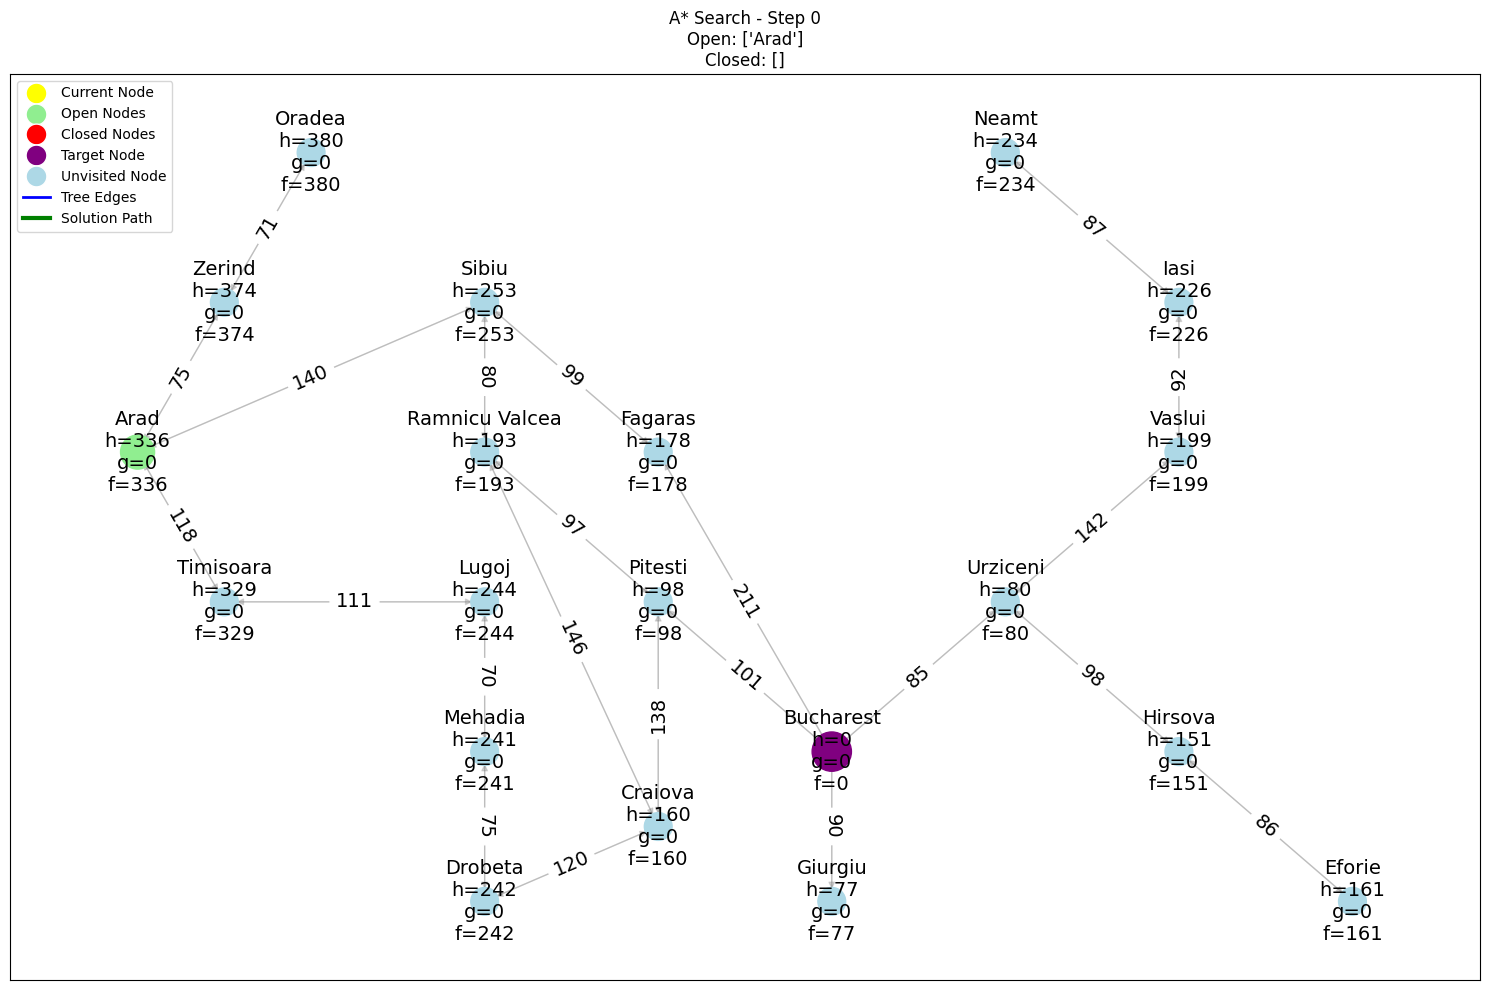

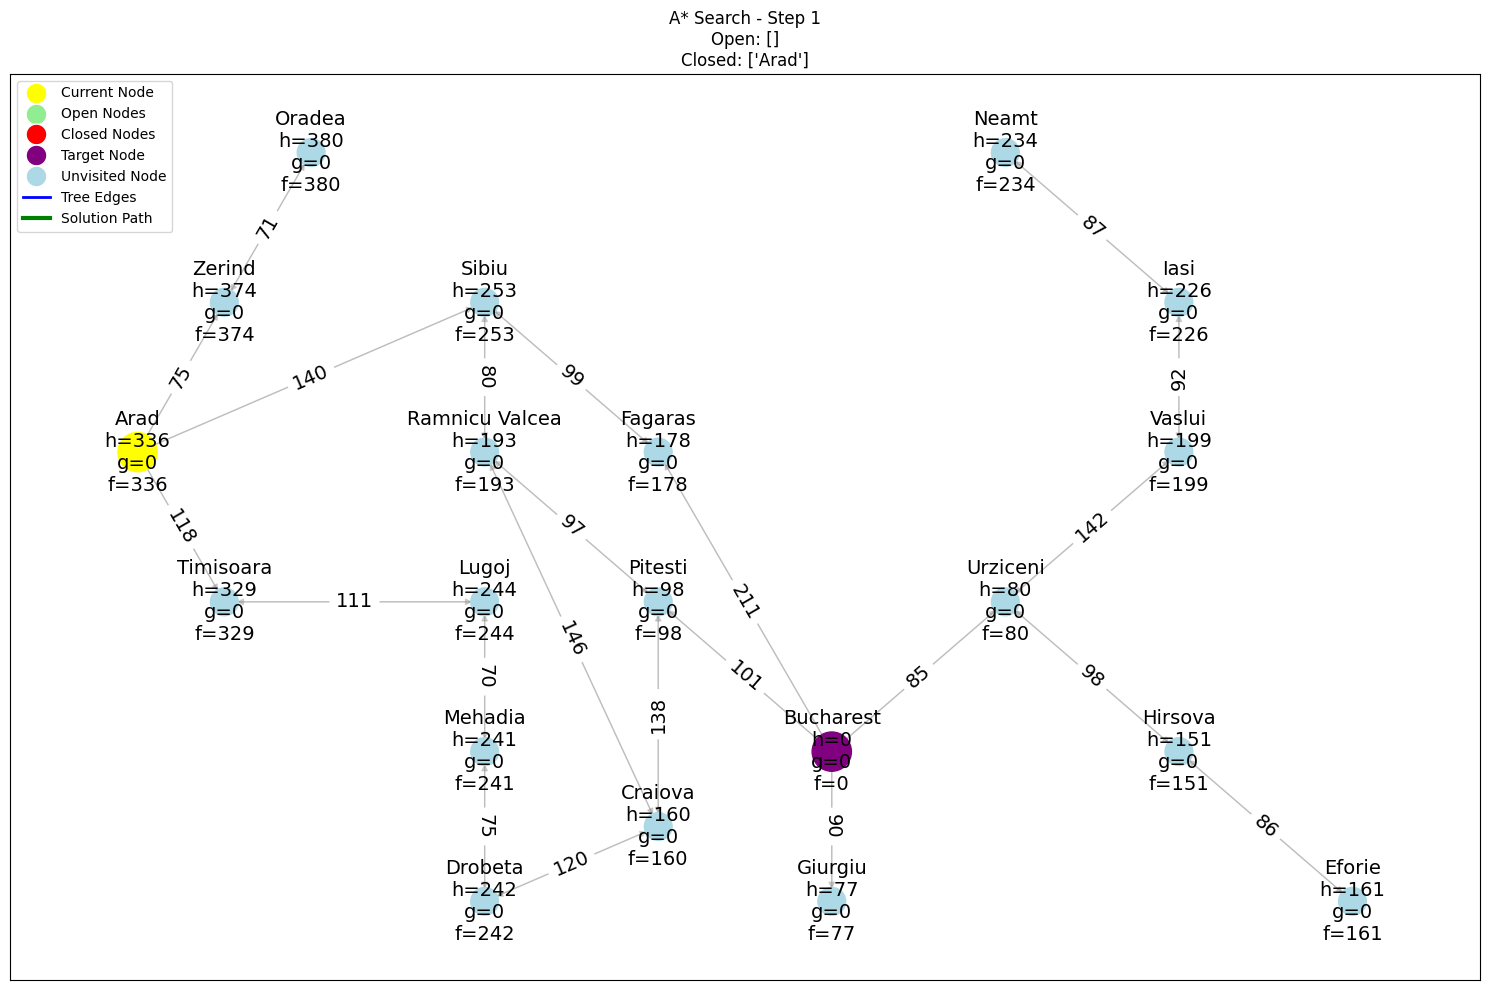

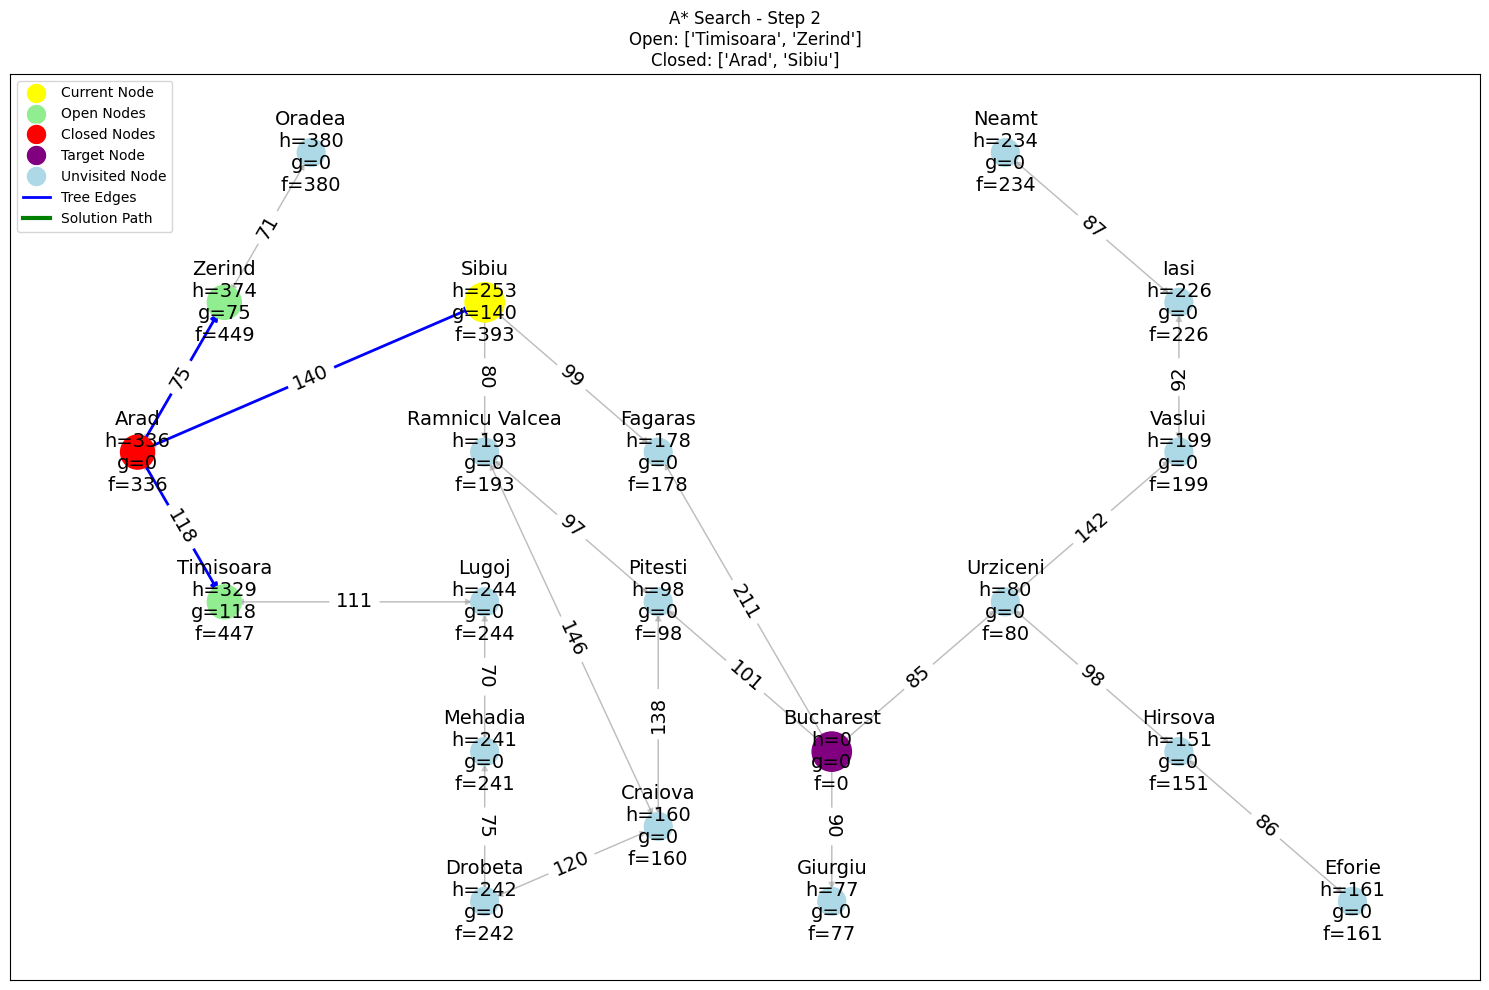

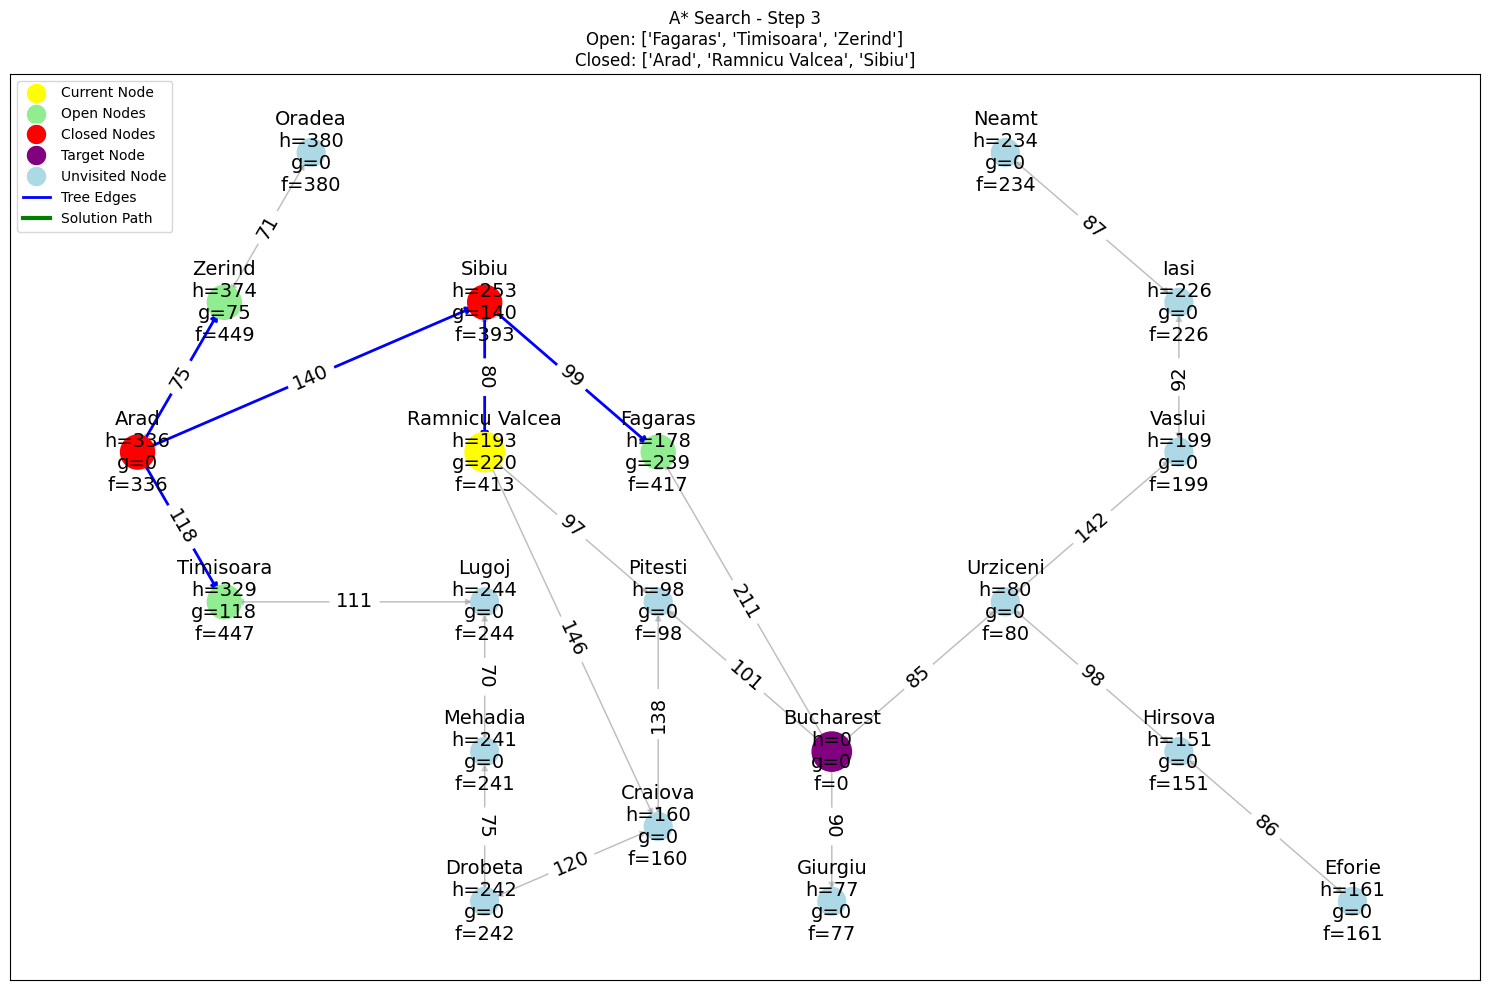

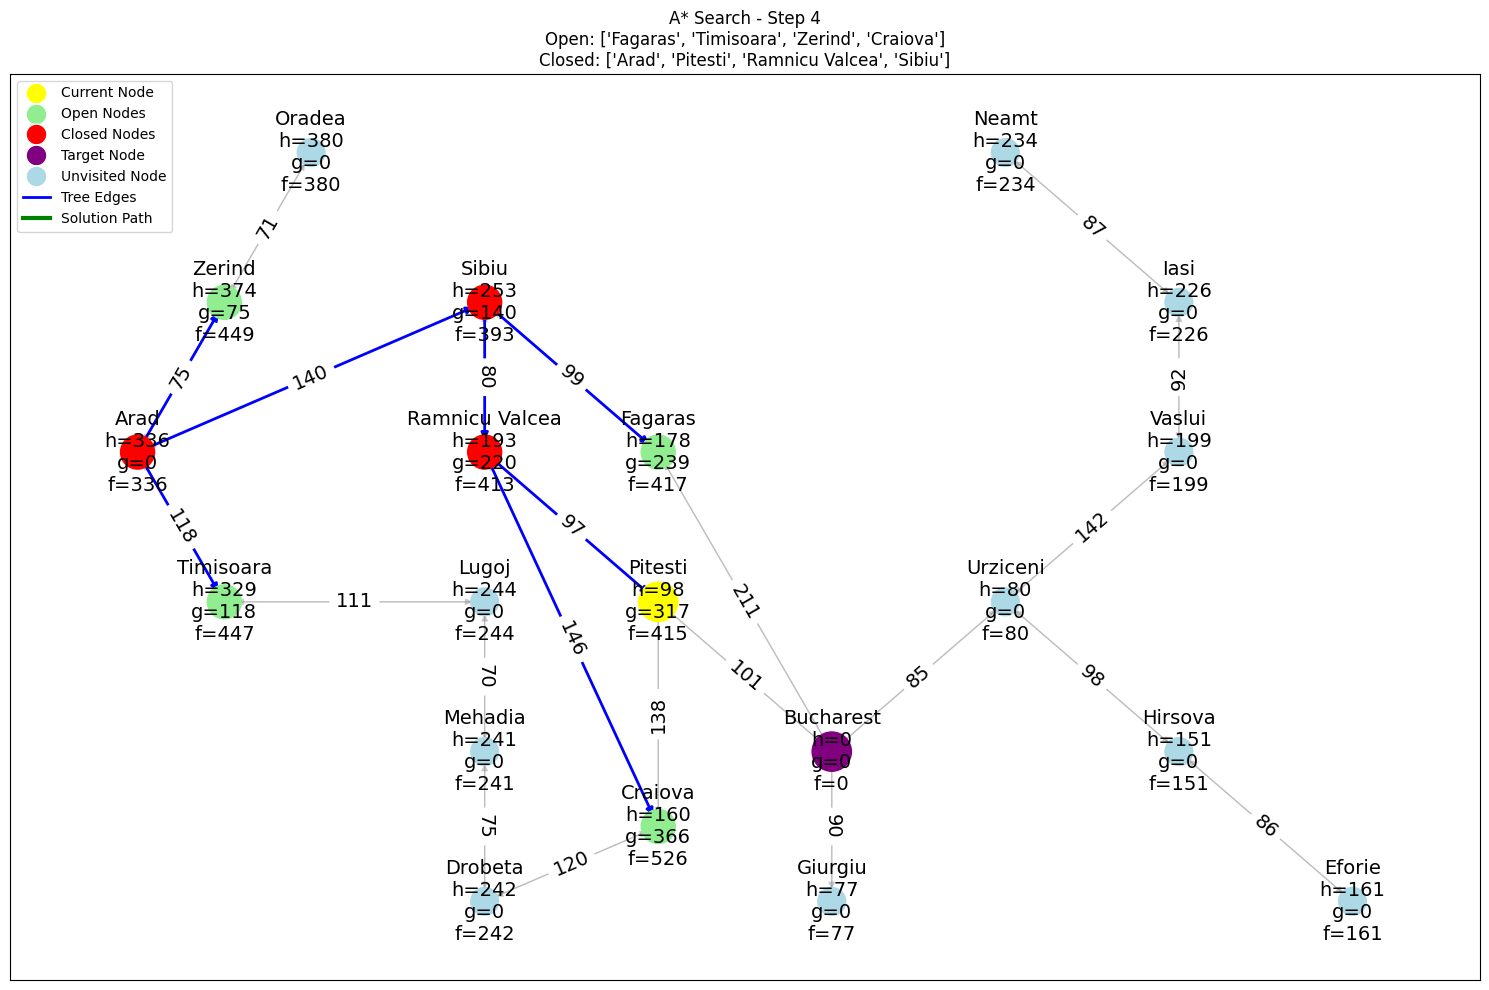

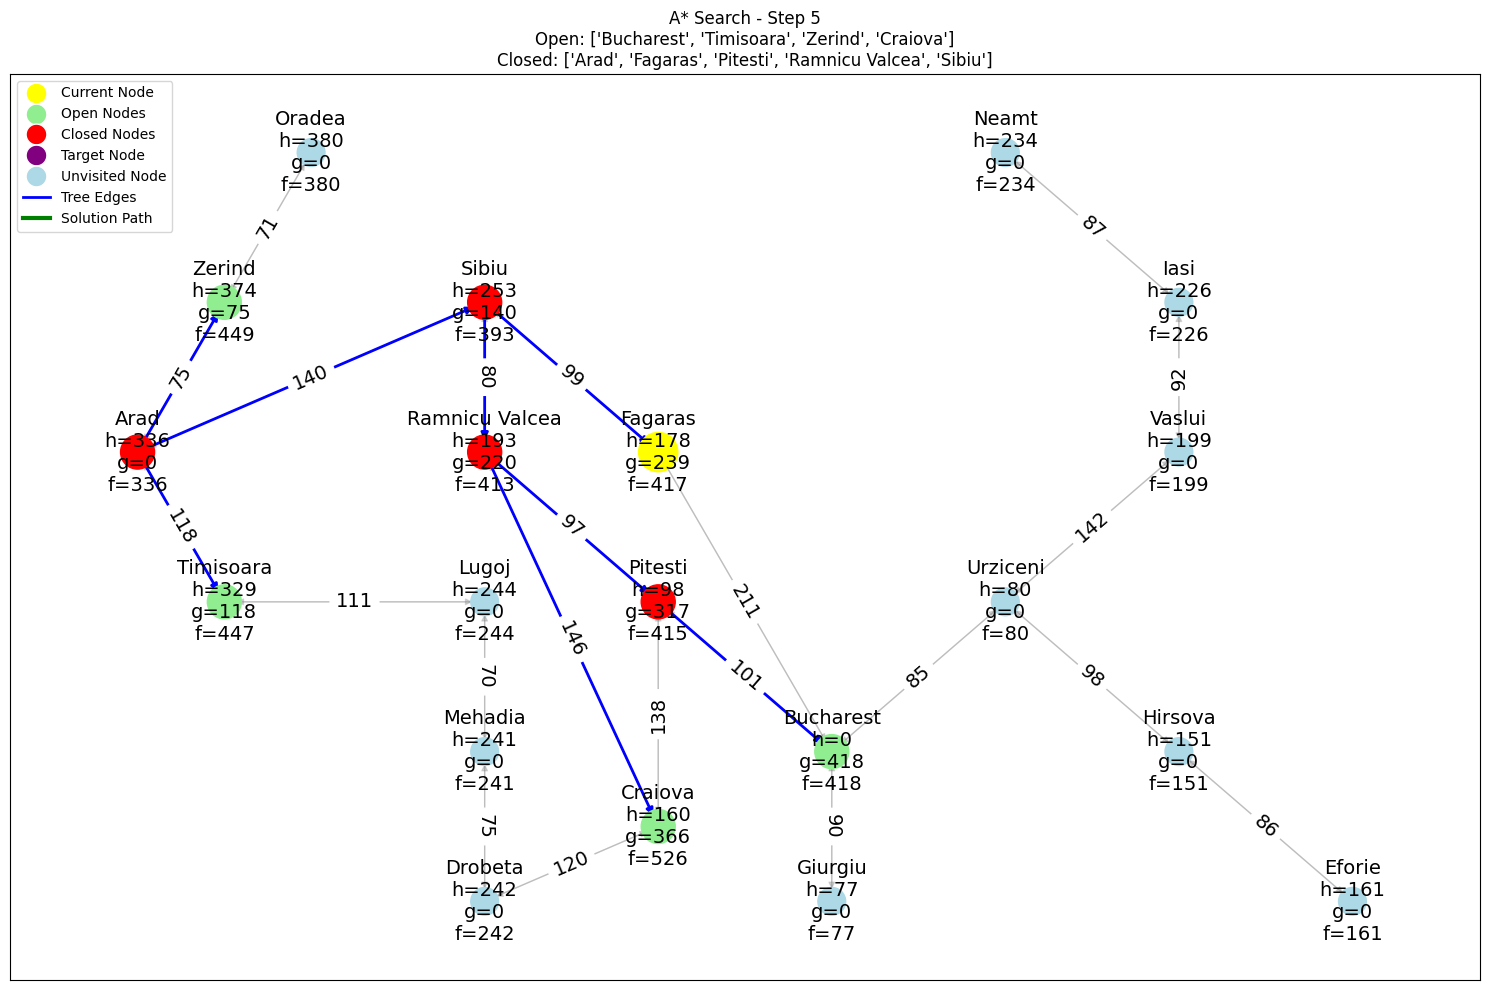

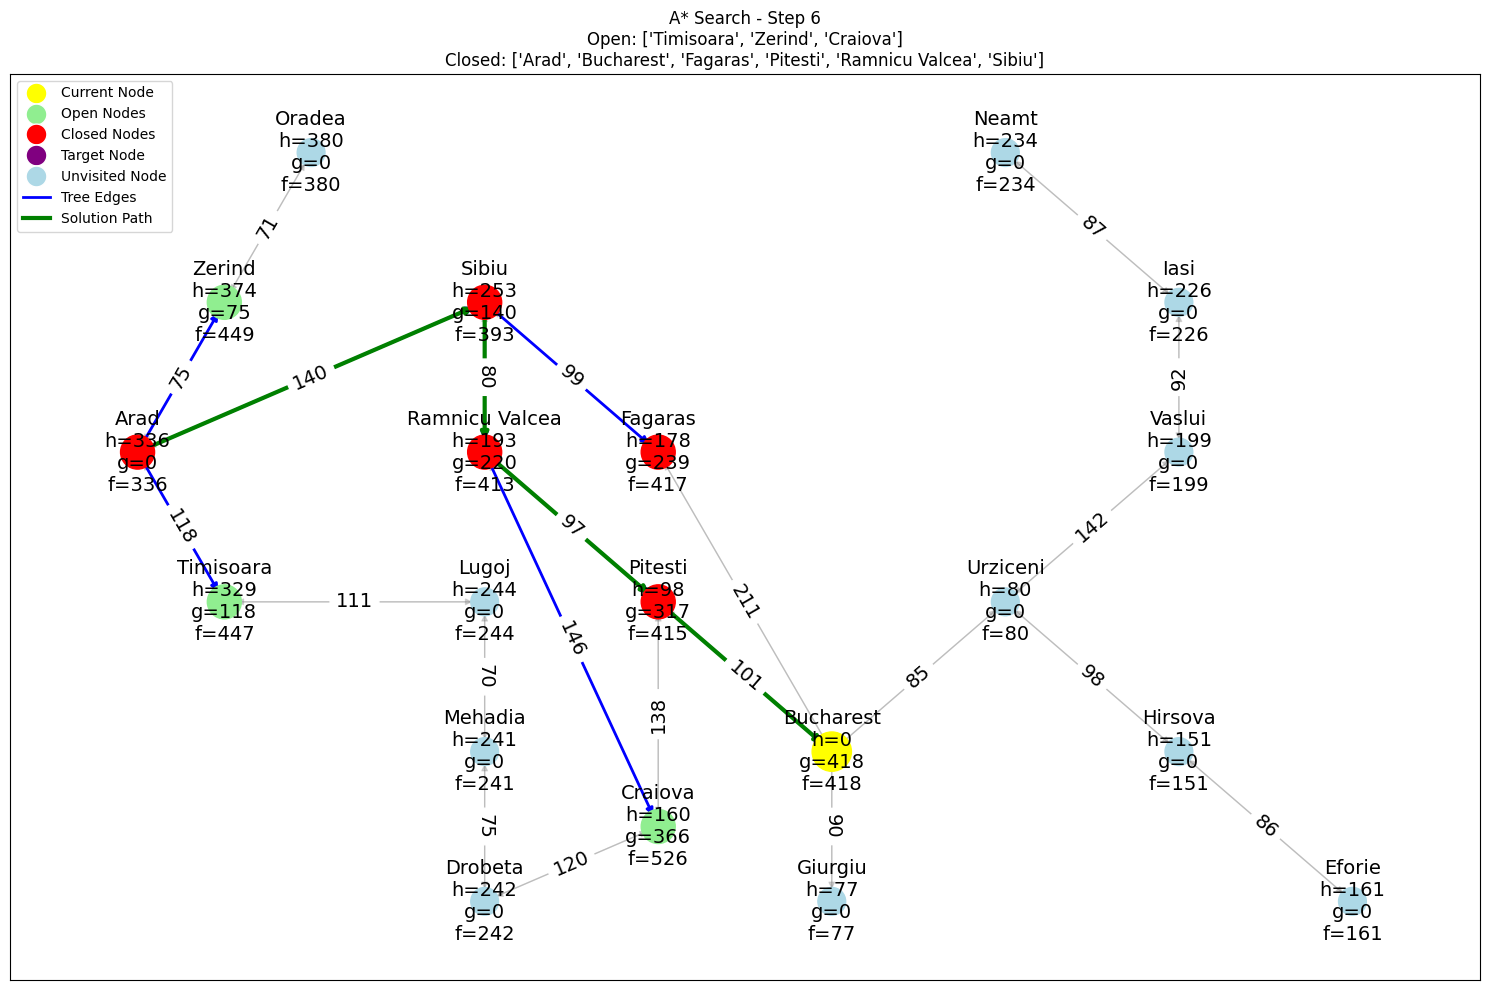

     The road is: 
1 .  Arad
2 .  Sibiu
3 .  Ramnicu Valcea
4 .  Pitesti
5 .  Bucharest
Cost of the road:  418
Saving visualization to astar_final_solution.png...


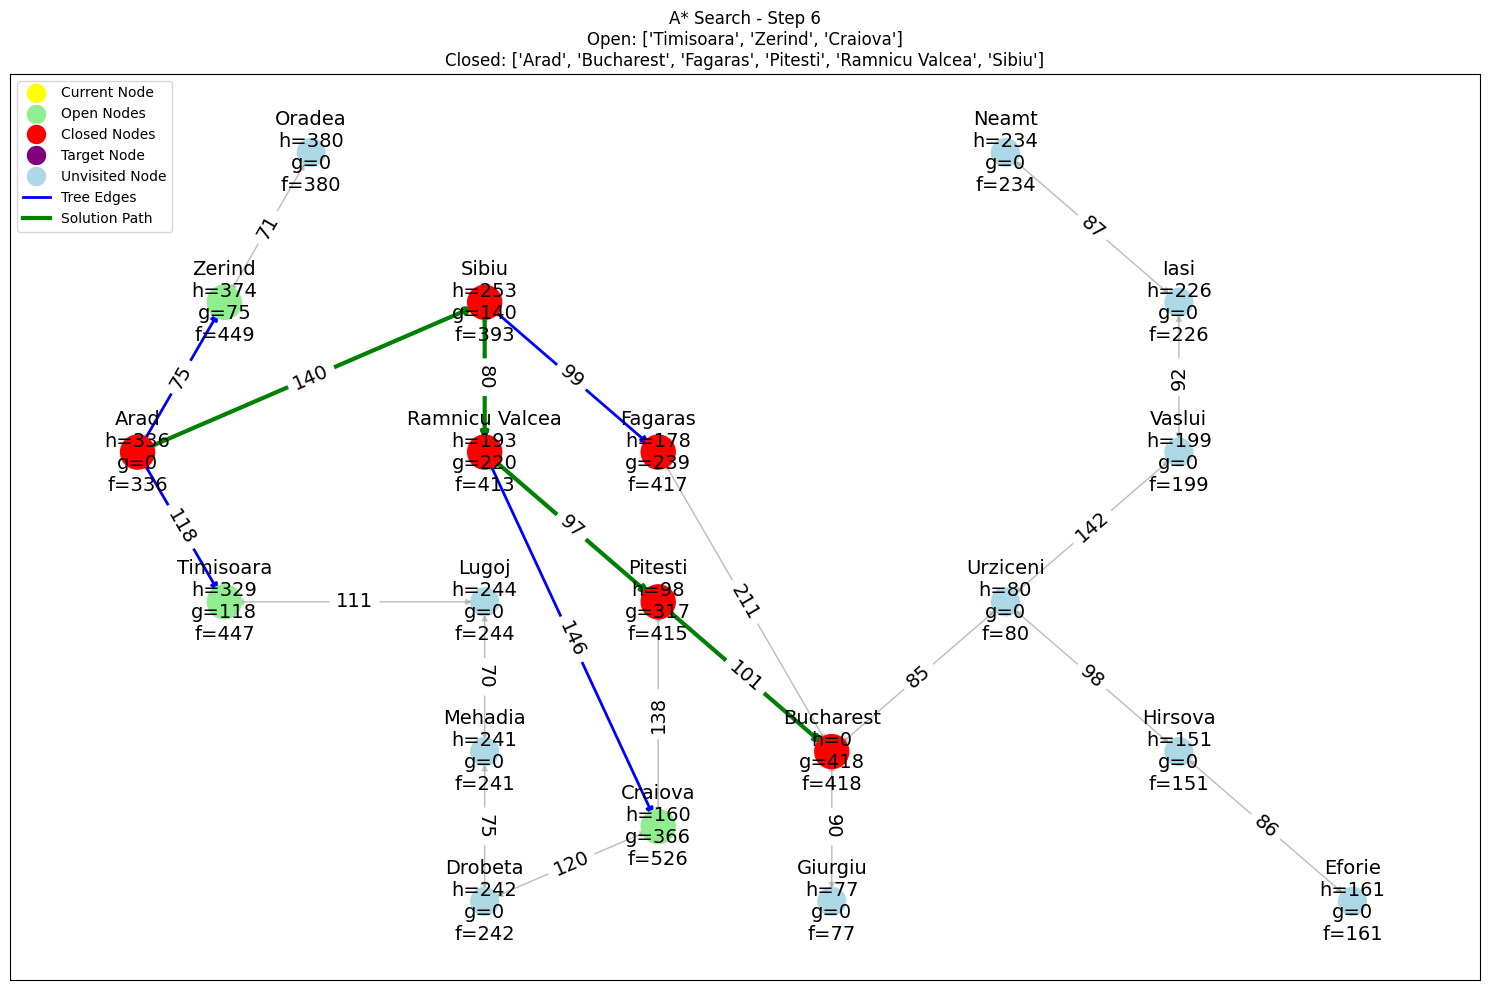

No steps made by program:  6



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, clear_output
import time

# This function makes a priority_queue sorted by f-value (heuristic + cost)
def insert_into_priority_queue(element, priority_queue):
    if len(priority_queue) == 0:
        priority_queue.append(element)
    else:
        current_element = priority_queue[0]
        i = 0
        while current_element[1]+current_element[2] <= element[1]+element[2]:
            if current_element[1]+current_element[2] == element[1]+element[2] and element[2] > current_element[2]:
                break
            i = i + 1
            if i >= len(priority_queue):
                break
            current_element = priority_queue[i]
        priority_queue.insert(i, element)

# This function verifies if a node is in the open list
def is_in_open(node, open):
    for i in open:
        if i[0] == node:
            return True
    return False

# This function shows the road from the root of the tree to the node
def show_road(tree, node):
    print("     The road is: ")
    list = []
    k = node
    while k is not None:
        list.append(k)
        k = tree[k]
    no = 0
    while len(list):
        no += 1
        print(no, ". ", list[len(list) - 1])
        list.pop()


class Graph:

    def __init__(self, arches, heuristics, matrix_size):
        self.nodes = []
        for i in heuristics.keys():
            self.nodes.append(i)
        self.arches = arches
        self.heuristics = heuristics
        self.matrix = np.zeros((matrix_size, matrix_size), dtype=int)
        self.convert_matrix()
        
        # Romania map approximate node positions
        self.node_positions = {
            'Arad': (1, 3),
            'Bucharest': (5, 1),
            'Craiova': (4, 0.5),
            'Drobeta': (3, 0),
            'Eforie': (8, 0),
            'Fagaras': (4, 3),
            'Giurgiu': (5, 0),
            'Hirsova': (7, 1),
            'Iasi': (7, 4),
            'Lugoj': (3, 2),
            'Mehadia': (3, 1),
            'Neamt': (6, 5),
            'Oradea': (2, 5),
            'Pitesti': (4, 2),
            'Ramnicu Valcea': (3, 3),
            'Sibiu': (3, 4),
            'Timisoara': (1.5, 2),
            'Urziceni': (6, 2),
            'Vaslui': (7, 3),
            'Zerind': (1.5, 4)
        }

    # This function converts the list of arches to an adjacency matrix
    def convert_matrix(self):
        for n in self.arches:
            i = self.nodes.index(n[0])
            j = self.nodes.index(n[1])
            self.matrix[i][j] = n[2]

    # This function returns the cost of the road from the root of the tree to the node
    def road_cost(self, node, tree):
        cost = 0
        last_node = node
        current_node = tree[last_node]
        while current_node is not None:
            cost = cost + self.matrix[self.nodes.index(current_node)][self.nodes.index(last_node)]
            last_node = current_node
            current_node = tree[last_node]
        return cost

    def get_solution_path(self, tree, target_node):
        path = []
        node = target_node
        while node is not None:
            path.append(node)
            node = tree[node]
        return path

    # Visualization method with option to save the figure
    def visualize_state(self, tree, open_list, closed_set, current=None, step_num=0, found_target=False, save_path=None, target_node=None):
        plt.figure(figsize=(15, 10))
        
        # Create graph
        G = nx.DiGraph()
        for node in self.nodes:
            G.add_node(node)
        for n in self.arches:
            G.add_edge(n[0], n[1], weight=n[2])
            # Add reverse edge for undirected visualization
            G.add_edge(n[1], n[0], weight=n[2])
        
        # Draw base graph edges
        nx.draw_networkx_edges(G, self.node_positions, alpha=0.3, edge_color='gray')
        
        # Draw tree edges
        tree_edges = []
        for child, parent in tree.items():
            if parent is not None:
                tree_edges.append((parent, child))
        
        tree_graph = nx.DiGraph()
        tree_graph.add_edges_from(tree_edges)
        nx.draw_networkx_edges(tree_graph, self.node_positions, edge_color='blue', width=2)
        
        # Draw solution path if found
        if found_target and target_node:
            path = self.get_solution_path(tree, target_node)
            path_edges = []
            for i in range(len(path)-1):
                path_edges.append((path[i+1], path[i]))
            
            path_graph = nx.DiGraph()
            path_graph.add_edges_from(path_edges)
            nx.draw_networkx_edges(path_graph, self.node_positions, edge_color='green', width=3)
        
        # Prepare node colors and sizes
        node_colors = []
        node_sizes = []
        
        for node in self.nodes:
            if current and node == current[0]:
                node_colors.append('yellow')  # Current node
                node_sizes.append(800)
            elif node in closed_set:
                node_colors.append('red')  # Closed nodes
                node_sizes.append(600)
            elif is_in_open(node, open_list):
                node_colors.append('lightgreen')  # Open nodes
                node_sizes.append(600)
            elif node in target_nodes:
                node_colors.append('purple')  # Target nodes
                node_sizes.append(800)
            else:
                node_colors.append('lightblue')  # Unvisited nodes
                node_sizes.append(400)
        
        # Draw nodes
        nx.draw_networkx_nodes(G, self.node_positions, node_color=node_colors, node_size=node_sizes)
        
        # Draw node labels with heuristic and cost information
        labels = {}
        for node in self.nodes:
            h = self.heuristics[node]
            cost = 0
            f_value = h
            
            if node in tree:
                cost = self.road_cost(node, tree)
                f_value = cost + h
            
            labels[node] = f"{node}\nh={h}\ng={cost}\nf={f_value}"
        
        nx.draw_networkx_labels(G, self.node_positions, labels=labels, font_size=14)
        
        # Draw edge labels (costs)
        edge_labels = {(n[0], n[1]): n[2] for n in self.arches}
        nx.draw_networkx_edge_labels(G, self.node_positions, edge_labels=edge_labels, font_size=14)
        
        # Create legend
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=15, label='Current Node'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=15, label='Open Nodes'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=15, label='Closed Nodes'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=15, label='Target Node'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=15, label='Unvisited Node'),
            plt.Line2D([0], [0], color='blue', lw=2, label='Tree Edges'),
            plt.Line2D([0], [0], color='green', lw=3, label='Solution Path')
        ]
        plt.legend(handles=legend_elements, loc='upper left')
        
        plt.title(f"A* Search - Step {step_num}\nOpen: {[n[0] for n in open_list]}\nClosed: {sorted(list(closed_set))}", fontsize=12)
        plt.tight_layout()
        
        # Save the figure if requested
        if save_path:
            print(f"Saving visualization to {save_path}...")
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
        # Display the plot
        display(plt.gcf())
        
        if not save_path:  # Only clear and close if not saving
            # clear_output(wait=True)
            plt.close()
        else:
            plt.close()
        
        time.sleep(0.5)  # Pause to see the visualization

    def astar(self, start_node, target_nodes):
        no_steps = 0
        print("--- A* algorithm --- informed search")
        tree = {}   # represents the generated tree of the graph of states
        open = [(start_node, self.heuristics[start_node], 0)]  # represents the expanded nodes of the tree
        # open is a list of tuples like (node_name, heuristic_value, cost)
        tree[start_node] = None  # initializing tree with the root
        close = set()   # represents visited nodes
        solutions = 0   # represents no of solutions found
        no_sol = len(target_nodes)  # represents no of solutions needed
        found_target_node = None
        
        # Initial visualization
        self.visualize_state(tree, open, close, step_num=no_steps)
        
        while len(open):
            no_steps += 1
            current_node = open.pop(0)  # eliminate the current node from open
            node_index = self.nodes.index(current_node[0])  # the index of the current node
            close.add(current_node[0])  # adding the current node to close

            # Visualize current state
            found_target = current_node[0] in target_nodes
            if found_target:
                found_target_node = current_node[0]
                
            self.visualize_state(tree, open, close, current=current_node, step_num=no_steps, 
                               found_target=found_target, target_node=found_target_node)
            
            if current_node[0] in target_nodes: # we found a solution
                solutions = solutions + 1
                show_road(tree, current_node[0])    # show the road to the solution
                print("Cost of the road: ", current_node[2])    # show the cost of the solution
                if solutions == no_sol:
                    break  # if we found all the solution, we stop

            for i in range(len(self.matrix)):
                # verifying if from the current node to the new one (i) is an archer
                if self.matrix[node_index][i] != 0:
                    # verify if the node is in open or close
                    if self.nodes[i] in close or is_in_open(self.nodes[i], open):
                        # retain the cost, and the father of node i before any change
                        prev_cost = self.road_cost(self.nodes[i], tree)
                        prev_father = tree[self.nodes[i]]
                        # change the nod i how was already visited
                        tree[self.nodes[i]] = current_node[0]
                        # if the change is good (the road is cheaper), we keep it
                        if self.road_cost(self.nodes[i], tree) < prev_cost:
                            insert_into_priority_queue(
                                (self.nodes[i], self.heuristics[self.nodes[i]], self.road_cost(self.nodes[i], tree)),
                                open)
                            # we put back the visited neighbours of this node in open
                            for j in range(len(self.matrix)):
                                if self.matrix[i][j] != 0 and self.nodes[j] in close:
                                    close.remove(self.nodes[j])
                                    insert_into_priority_queue(
                                        (self.nodes[j], self.heuristics[self.nodes[j]],
                                         self.road_cost(self.nodes[j], tree)),
                                        open)
                        # if the change is not good, we take back to the last version
                        else:
                            tree[self.nodes[i]]=prev_father
                    # if the node is not in open or close, we simply add it to tree and open
                    else:
                        tree[self.nodes[i]] = current_node[0]
                        insert_into_priority_queue((self.nodes[i], self.heuristics[self.nodes[i]], self.road_cost(self.nodes[i], tree)),
                                                   open)

        # Final visualization showing the solution path
        if solutions > 0 and found_target_node:
            # Create a new figure specially for saving
            self.visualize_state(tree, open, close, step_num=no_steps, found_target=True, 
                               save_path='astar_final_solution.png', target_node=found_target_node)
            
        print("No steps made by program: ", no_steps)
        print()


# Dates

# This is the list of arches in our graph, the third value represents the cost
arches = [('Arad', 'Zerind', 75), ('Arad', 'Sibiu', 140), ('Arad', 'Timisoara', 118),
          ('Zerind', 'Oradea', 71),
          ('Sibiu', 'Fagaras', 99), ('Sibiu', 'Ramnicu Valcea', 80),
          ('Timisoara', 'Lugoj', 111),
          ('Fagaras', 'Bucharest', 211),
          ('Ramnicu Valcea', 'Pitesti', 97), ('Ramnicu Valcea', 'Craiova', 146),
          ('Lugoj', 'Mehadia', 70),
          ('Mehadia', 'Drobeta', 75),
          ('Drobeta', 'Craiova', 120),
          ('Craiova', 'Pitesti', 138),
          ('Pitesti', 'Bucharest', 101),
          ('Bucharest', 'Giurgiu', 90),
          ('Bucharest', 'Urziceni', 85),
          ('Urziceni', 'Vaslui', 142), ('Urziceni', 'Hirsova', 98),
          ('Hirsova', 'Eforie', 86),
          ('Vaslui', 'Iasi', 92),
          ('Iasi', 'Neamt', 87)]

# The heuristics for each node represents the straight distance from target_node to them
heuristics = {
    'Arad': 336,
    'Bucharest': 0,
    'Craiova': 160,
    'Drobeta': 242,
    'Eforie': 161,
    'Fagaras': 178,
    'Giurgiu': 77,
    'Hirsova': 151,
    'Iasi': 226,
    'Lugoj': 244,
    'Mehadia': 241,
    'Neamt': 234,
    'Oradea': 380,
    'Pitesti': 98,
    'Ramnicu Valcea': 193,
    'Sibiu': 253,
    'Timisoara': 329,
    'Urziceni': 80,
    'Vaslui': 199,
    'Zerind': 374
}

# Matrix_size represents the length of the adjacency matrix
matrix_size = len(heuristics.keys())

# Creating the graph object
graph = Graph(arches, heuristics, matrix_size)
stat_node = 'Arad'
target_nodes = ['Bucharest']

# Call the algorithm with visualization
graph.astar(stat_node, target_nodes)

## Lab 3 - Hill-Climbing

Solving 8-Queens problem with Hill Climbing...
Each number shows the heuristic value (negative attacks) if a queen is placed there
Higher values (less negative) indicate better positions

Attempt 1/3:
Initial state - Attacking pairs: 10


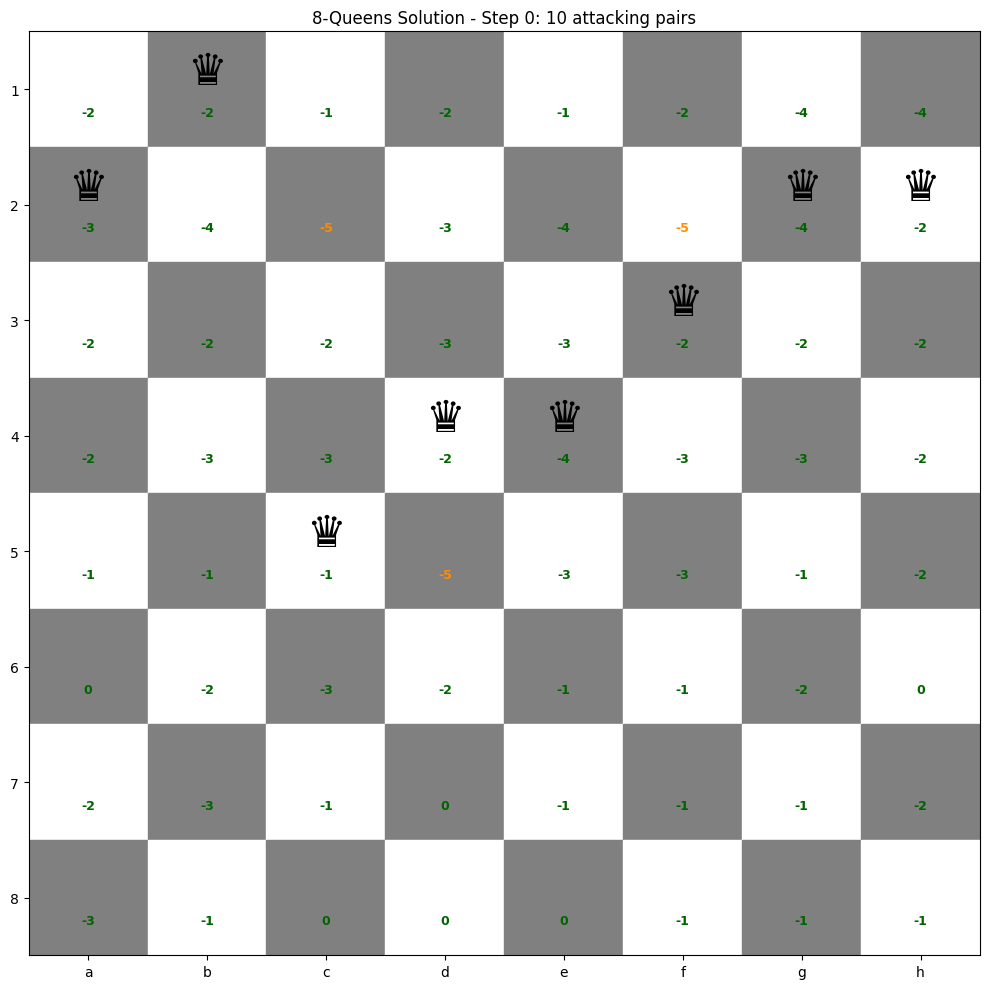

Step 1 - Attacking pairs: 6
Moved queen in column e to row 1


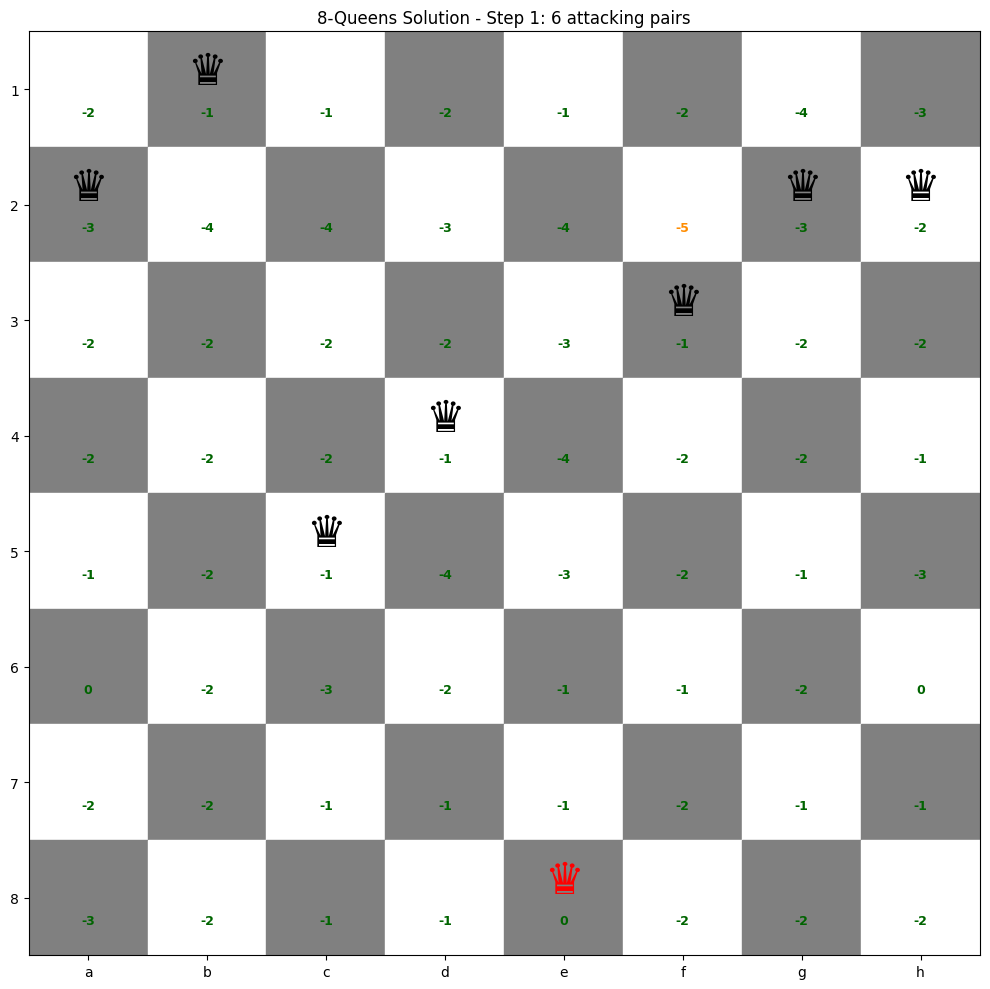

Step 2 - Attacking pairs: 3
Moved queen in column a to row 3


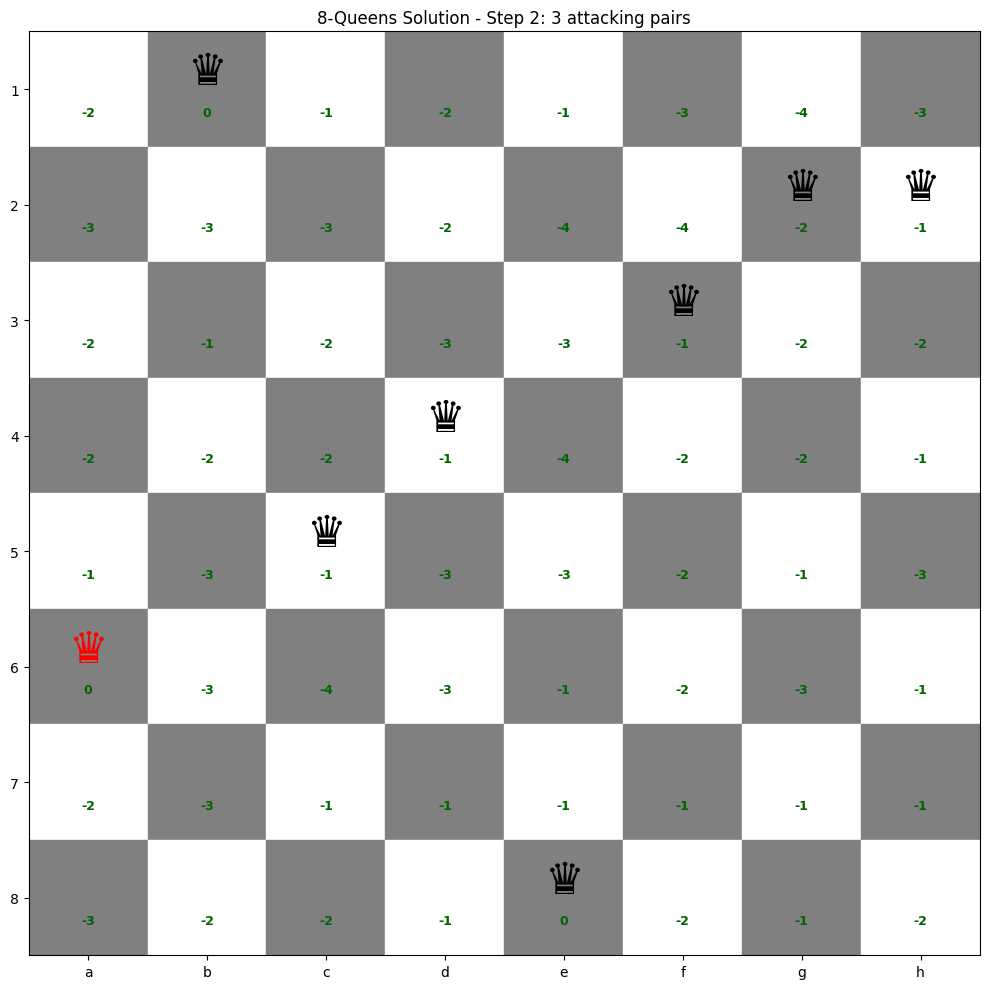

Step 3 - Attacking pairs: 2
Moved queen in column g to row 4


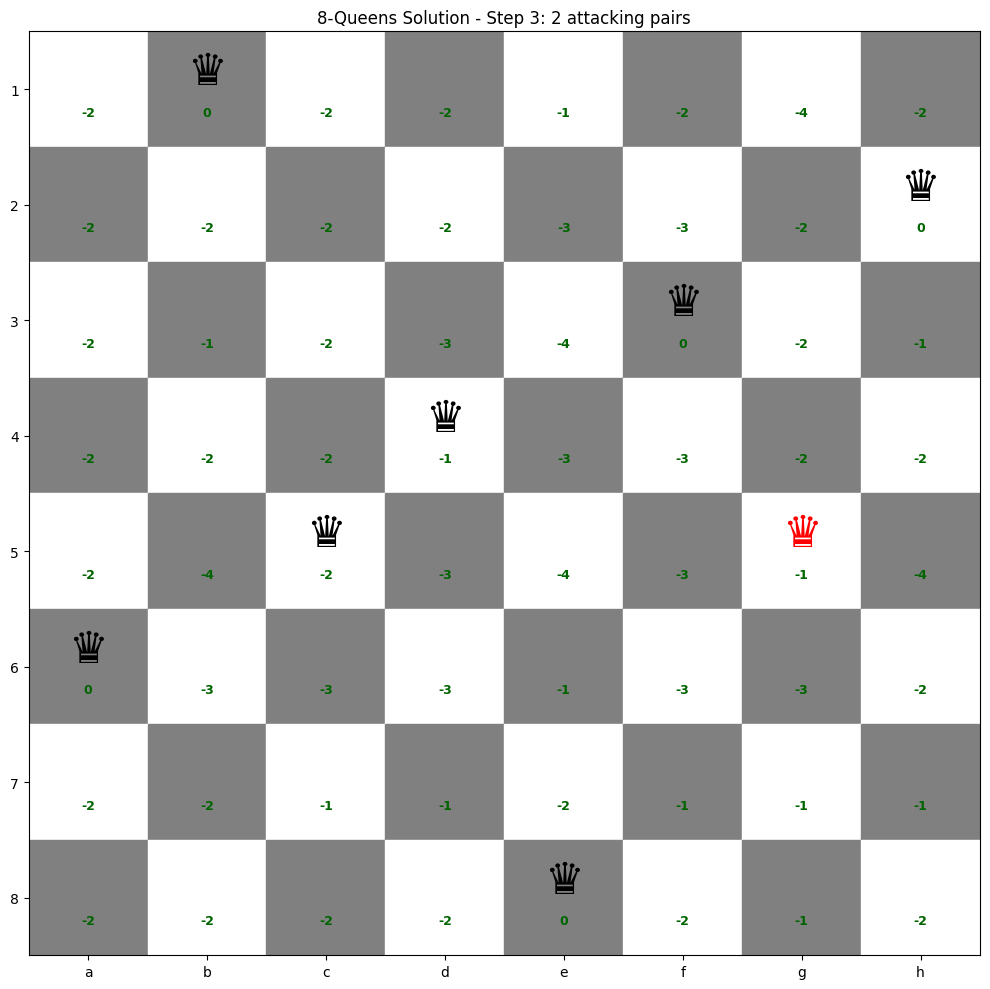

Step 4 - Attacking pairs: 1
Moved queen in column c to row 2


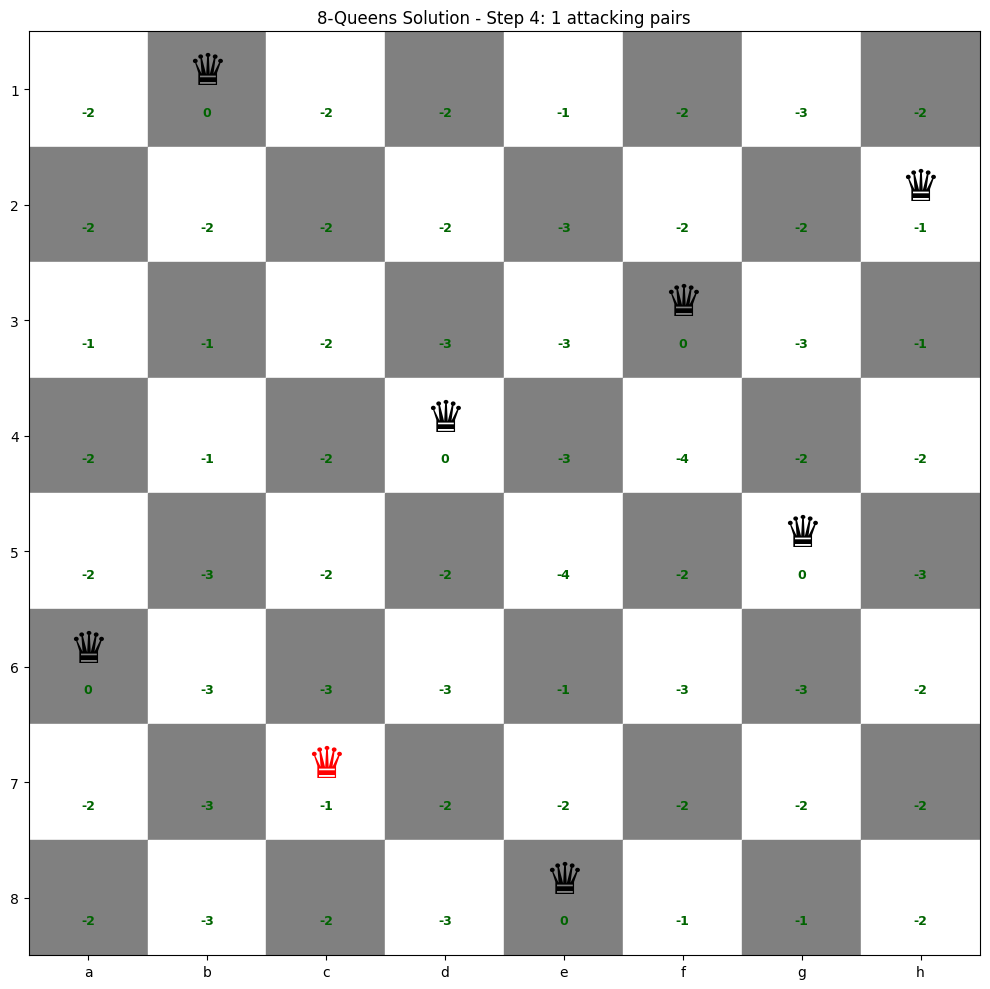

Local maximum reached at step 5. No better neighbors.


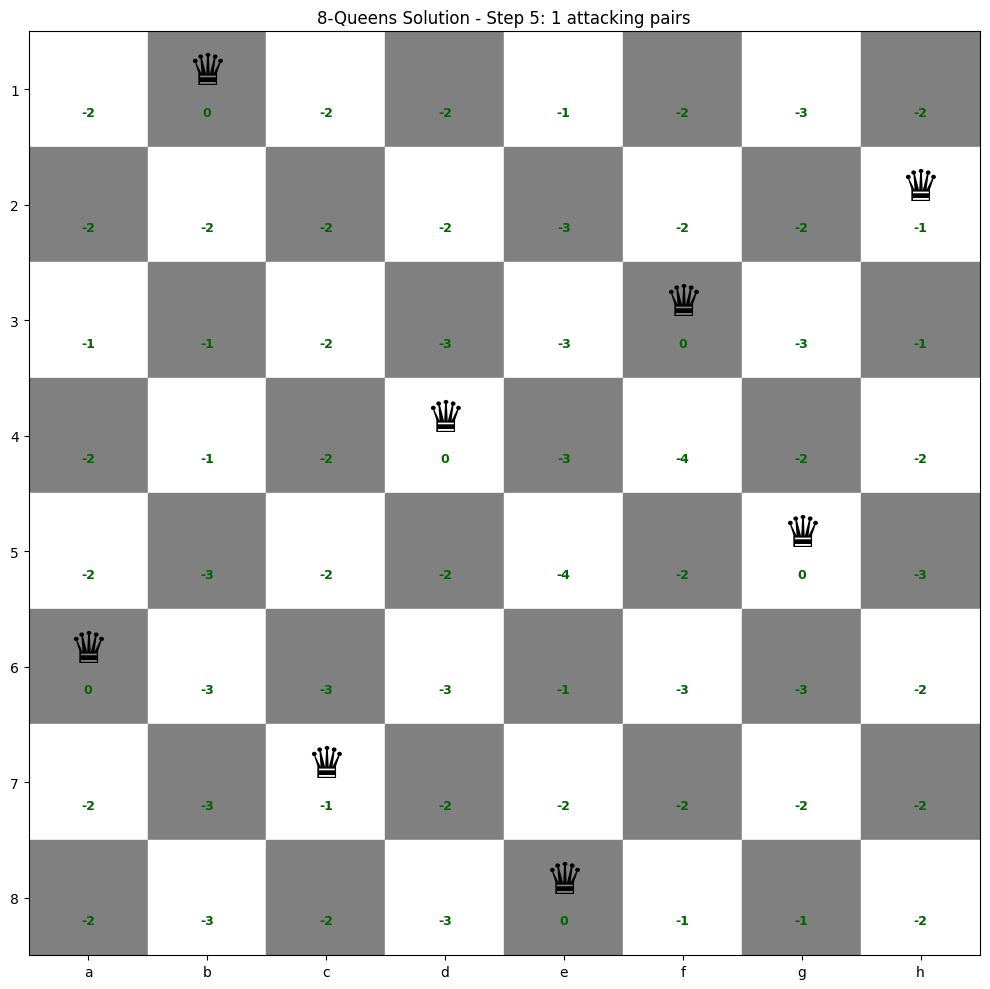

Attempt 1 result: Found state with 1 attacking pairs after 5 steps

Attempt 2/3:
Initial state - Attacking pairs: 11


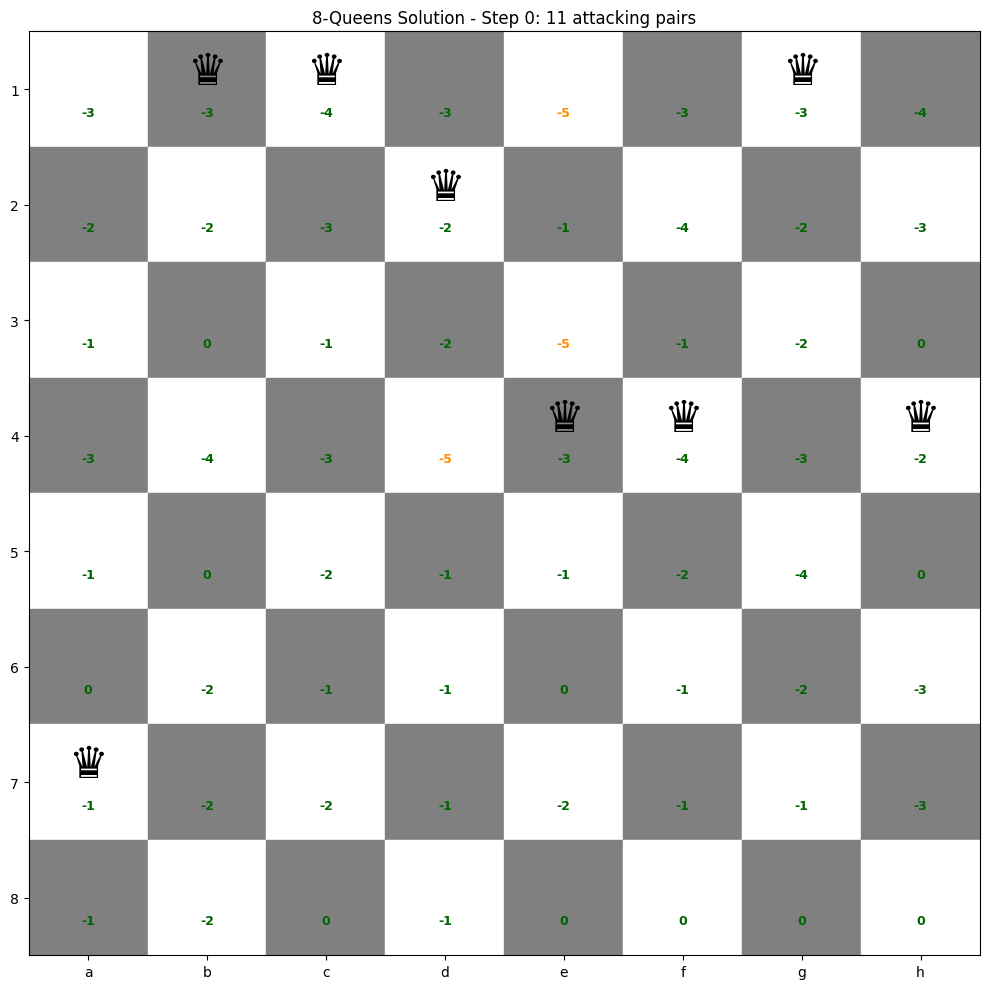

Step 1 - Attacking pairs: 7
Moved queen in column c to row 1


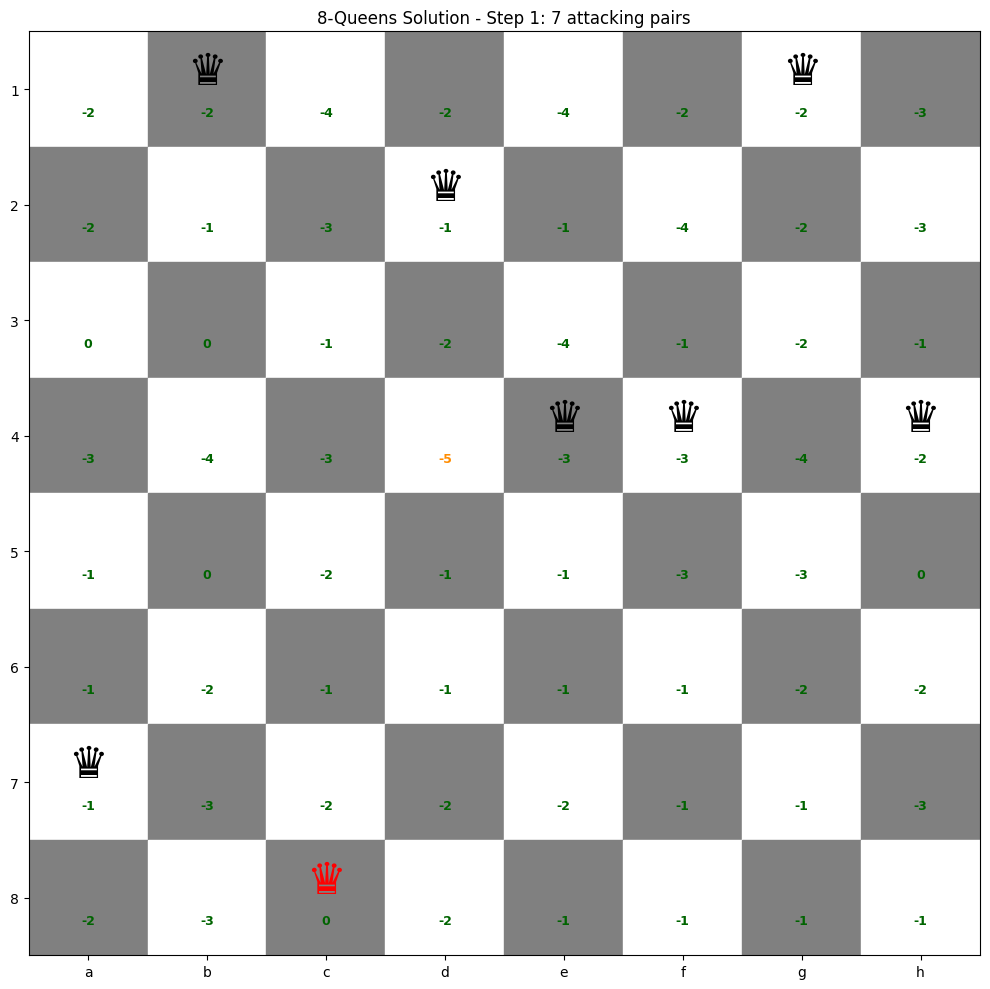

Step 2 - Attacking pairs: 5
Moved queen in column b to row 6


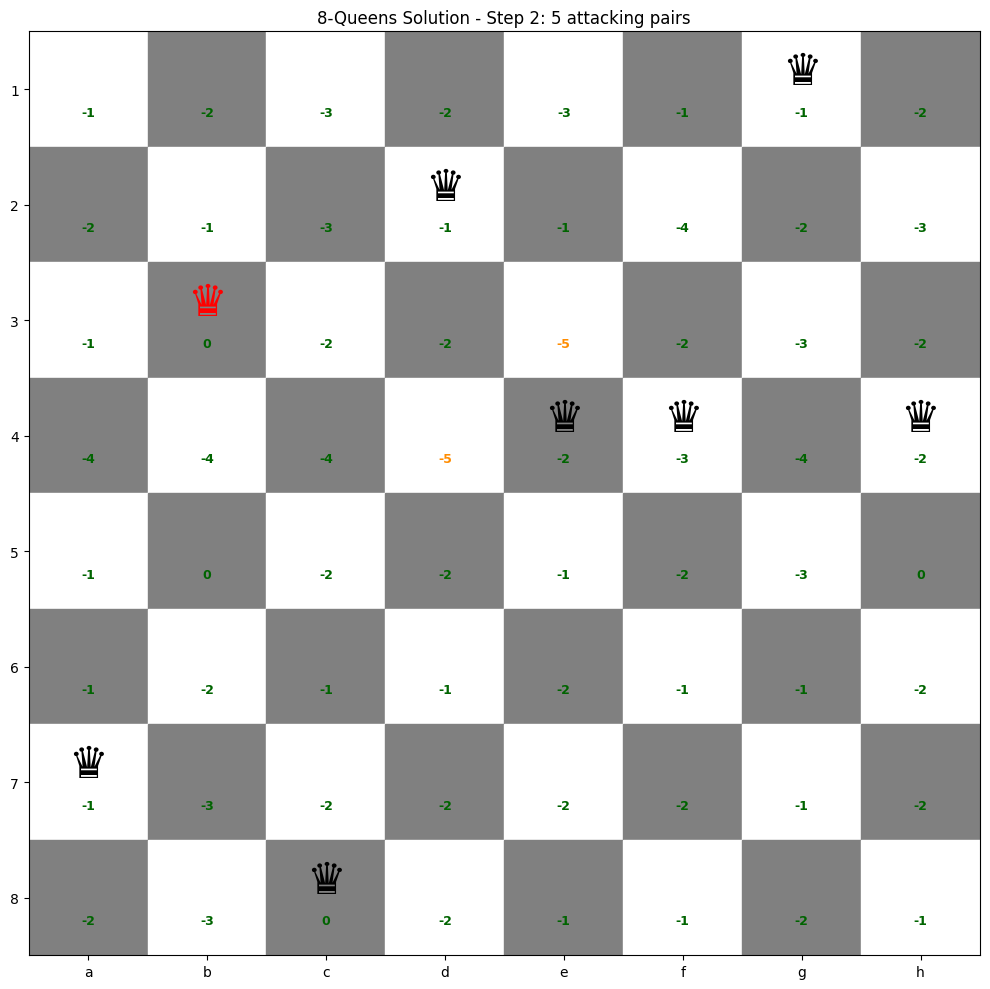

Step 3 - Attacking pairs: 3
Moved queen in column f to row 8


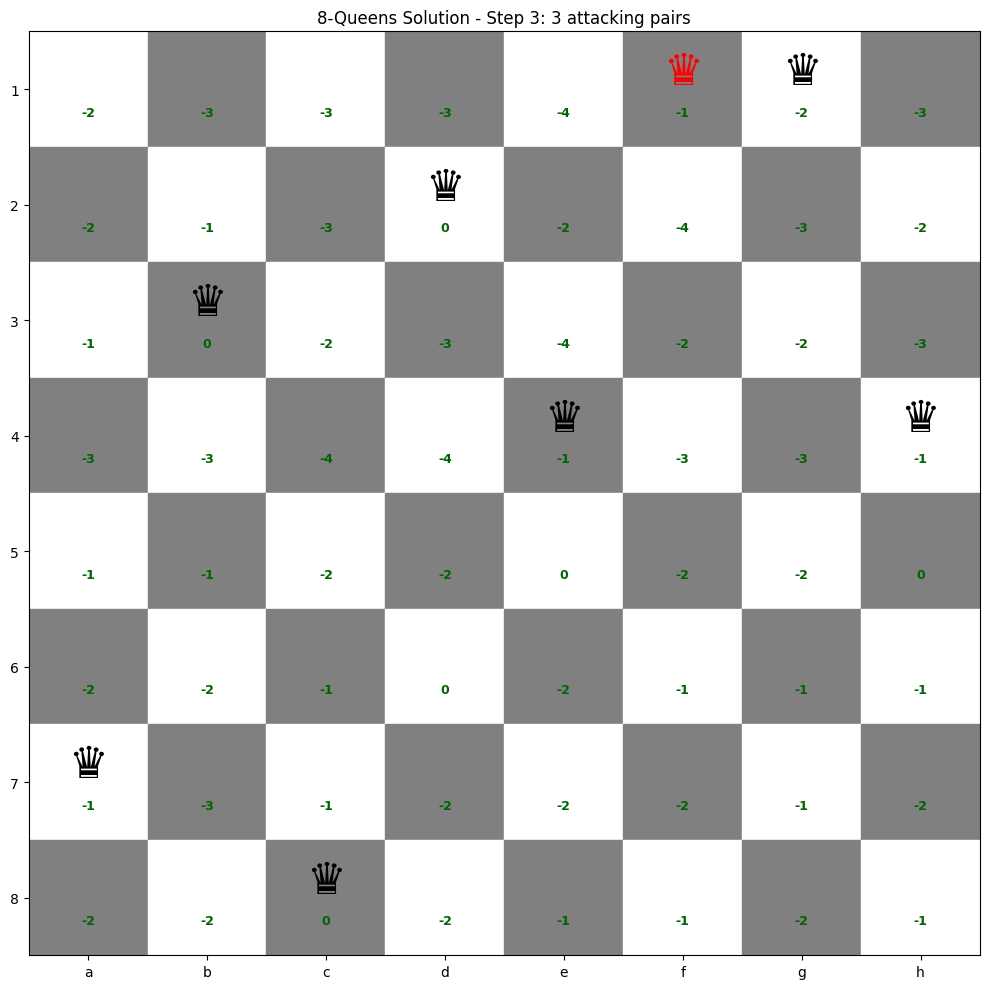

Step 4 - Attacking pairs: 2
Moved queen in column e to row 4


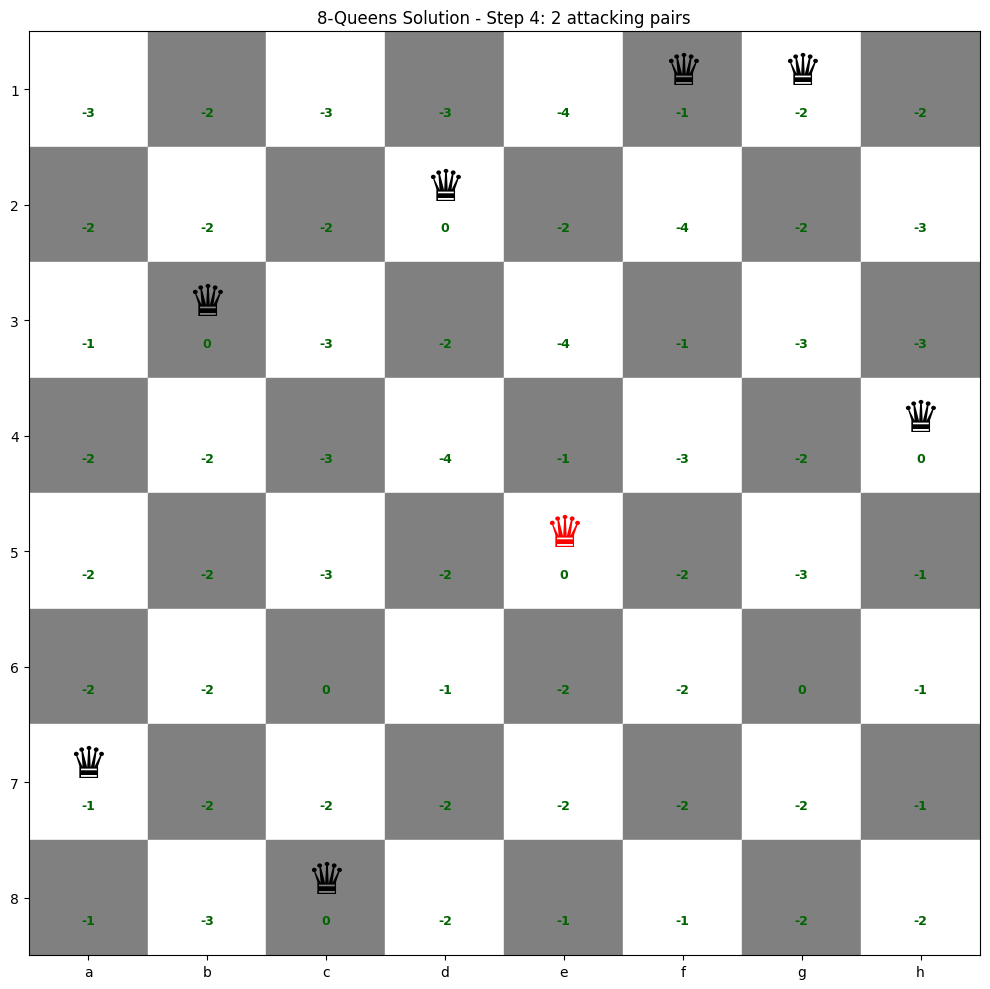

Step 5 - Attacking pairs: 0
Moved queen in column g to row 3


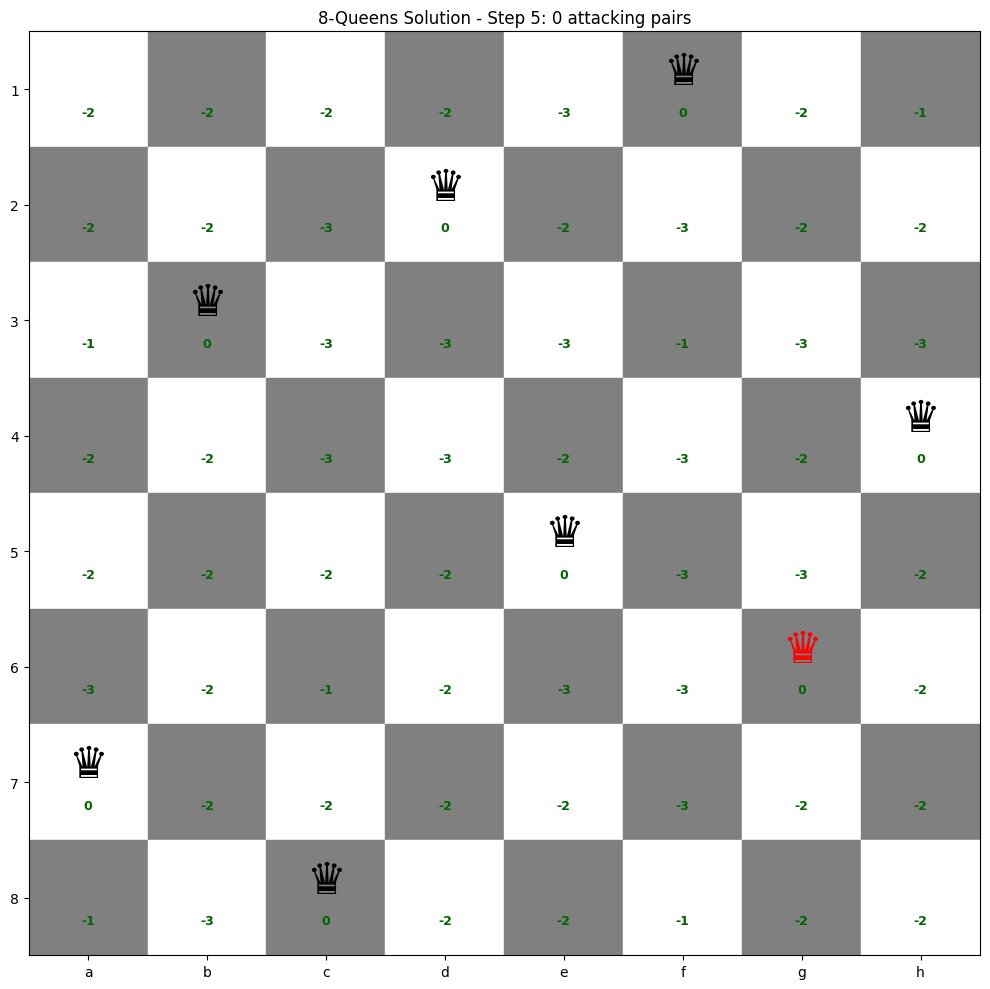

Solution found at step 5!


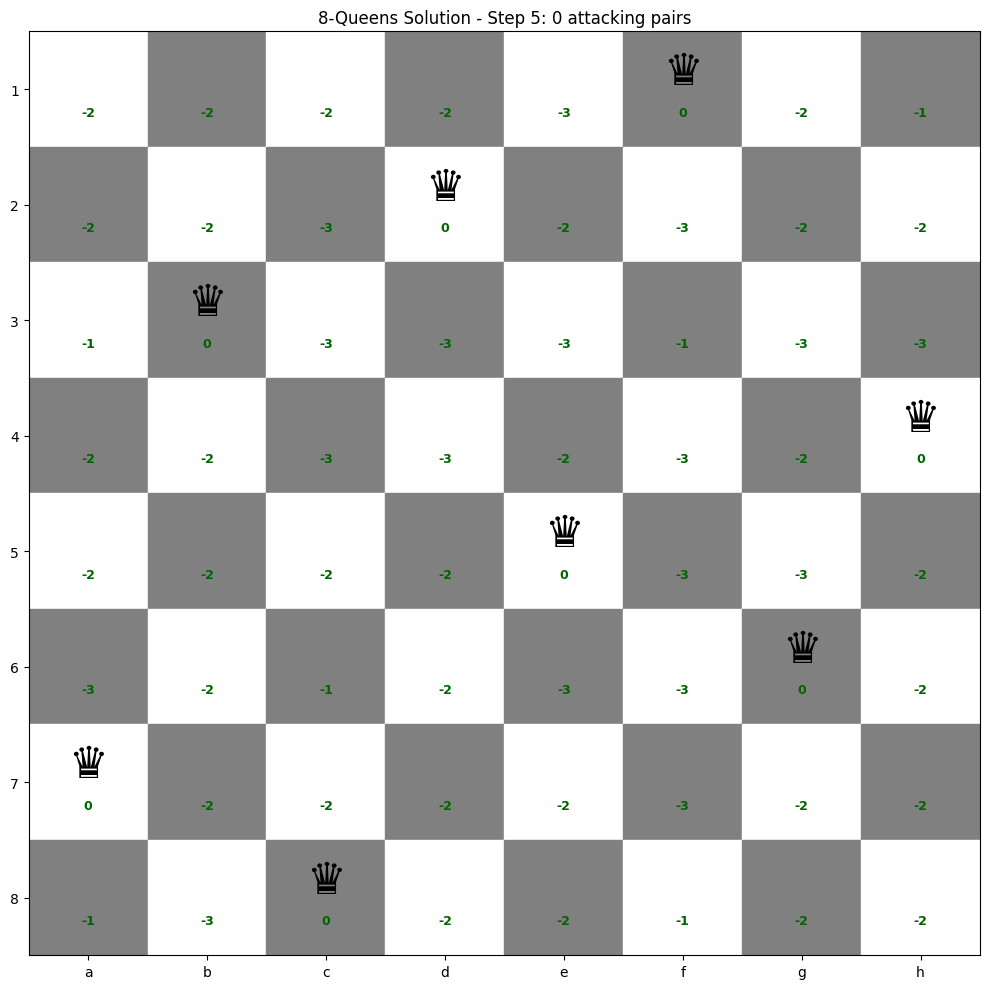

Attempt 2 result: Found state with 0 attacking pairs after 5 steps
Found optimal solution (no attacking pairs)!

Best Solution:
Queen positions (column → row): [6, 2, 7, 1, 4, 0, 5, 3]
Number of attacking pairs: 0
Total steps: 10

Final board state saved as: 8queens_final_solution.png


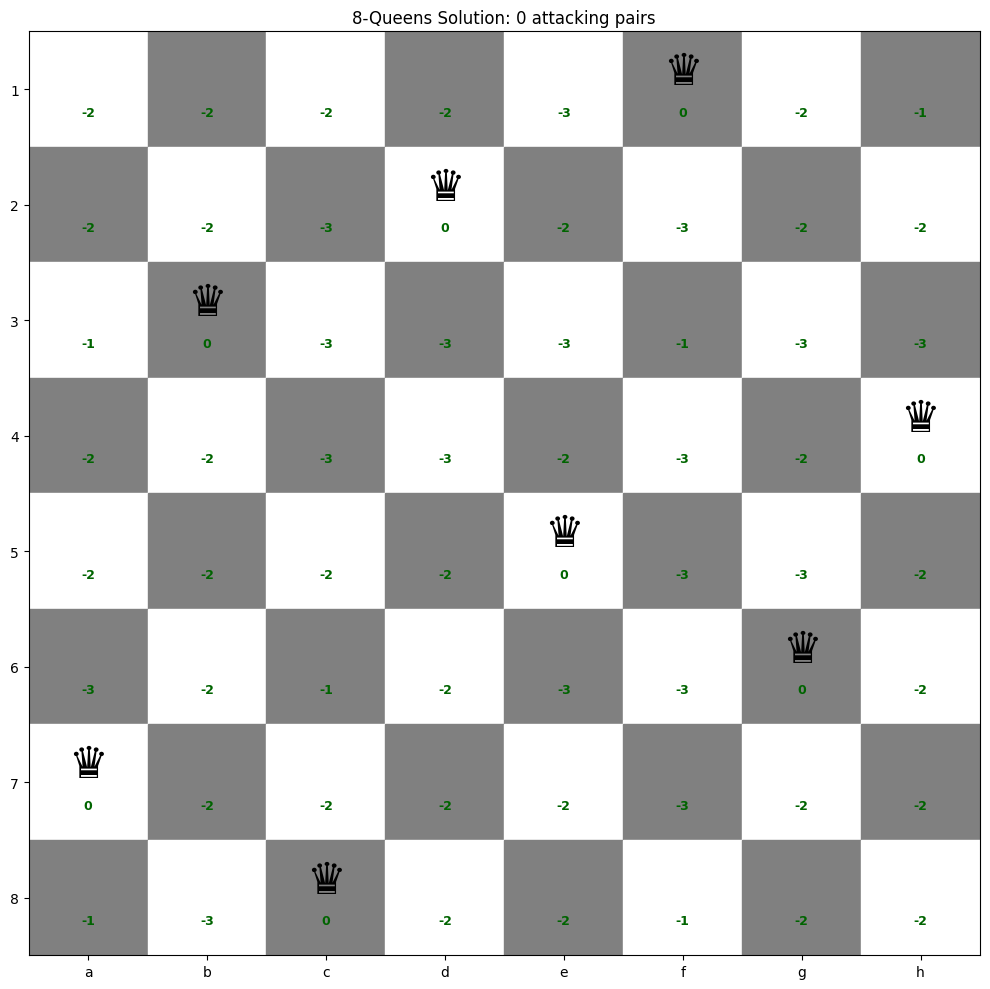

In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.colors import LinearSegmentedColormap

def evaluate(state):
    """
    Evaluation function - counts non-attacking pairs of queens
    Higher value is better (0 attacking pairs = optimal solution)
    """
    n = len(state)
    attacks = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            # Check if queens are in same row
            if state[i] == state[j]:
                attacks += 1
            
            # Check if queens are on same diagonal
            if abs(state[i] - state[j]) == abs(i - j):
                attacks += 1
    
    # Return negative of attacks (higher is better)
    return -attacks

def calculate_cell_heuristic(state, col, row):
    """
    Calculate the heuristic value for placing a queen at a specific cell
    Returns number of attacks if a queen was placed here
    """
    # Create a new state with the queen placed at this position
    test_state = state.copy()
    test_state[col] = row
    
    # Count attacks for this queen against all others
    n = len(state)
    attacks = 0
    
    for other_col in range(n):
        if other_col == col:
            continue  # Skip the column we're testing
            
        other_row = test_state[other_col]
        
        # Check if queens are in same row
        if row == other_row:
            attacks += 1
        
        # Check if queens are on same diagonal
        if abs(row - other_row) == abs(col - other_col):
            attacks += 1
    
    return -attacks  # Return negative attacks (higher is better)

def get_neighbors(state):
    """Generate all neighbor states by moving one queen at a time"""
    neighbors = []
    n = len(state)
    
    for col in range(n):
        current_row = state[col]
        
        # Try placing the queen in each row of this column
        for row in range(n):
            if row != current_row:
                new_state = state.copy()
                new_state[col] = row
                neighbors.append(new_state)
    
    return neighbors

def display_board_with_heuristics(state, step_num=None, current_value=None, last_move=None):
    """Display the chessboard with queens and heuristic values"""
    n = len(state)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Create a chessboard pattern
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                square_color = 'white'
            else:
                square_color = 'gray'
                
            # Draw the square
            rect = plt.Rectangle((j, n-i-1), 1, 1, color=square_color)
            ax.add_patch(rect)
            
            # Calculate heuristic for this position
            # We need to temporarily move the queen in this column to calculate
            orig_row = state[j]
            heuristic = calculate_cell_heuristic(state, j, i)
            
            # Determine text color based on heuristic
            if heuristic > -5:  # Few or no attacks
                text_color = 'darkgreen'
            elif heuristic > -10:  # Moderate attacks
                text_color = 'darkorange'
            else:  # Many attacks
                text_color = 'darkred'
            
            # Add the heuristic value for all cells
            plt.text(j + 0.5, n - i - 0.7, f"{heuristic}", 
                    ha='center', va='center', fontsize=9,
                    color=text_color, fontweight='bold')
    
    # Plot queens
    for col, row in enumerate(state):
        queen_color = 'black'
        
        # Highlight last moved queen
        if last_move is not None and col == last_move:
            queen_color = 'red'
            
        plt.text(col + 0.5, n - row - 0.35, '♛', fontsize=32, 
                ha='center', va='center', color=queen_color)
    
    plt.xlim(0, n)
    plt.ylim(0, n)
    plt.xticks(np.arange(0.5, n, 1), ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
    plt.yticks(np.arange(0.5, n, 1), ['8', '7', '6', '5', '4', '3', '2', '1'])
    
    title = '8-Queens Solution'
    if step_num is not None:
        title += f' - Step {step_num}'
    if current_value is not None:
        title += f': {-current_value} attacking pairs'
    
    plt.title(title)
    plt.tight_layout()
    
    # Return figure for saving the last state
    return fig

def hill_climbing(initial_state, show_steps=True):
    """Hill climbing algorithm implementation with visualization of each step"""
    current = initial_state
    current_value = evaluate(current)
    steps = 0
    last_fig = None
    
    if show_steps:
        print(f"Initial state - Attacking pairs: {-current_value}")
        last_fig = display_board_with_heuristics(current, steps, current_value)
        plt.show()
        time.sleep(0.5)
    
    while True:
        steps += 1
        
        # Get all neighbors
        neighbors = get_neighbors(current)
        
        # Find the best neighbor
        best_neighbor = None
        best_value = float('-inf')
        
        for neighbor in neighbors:
            neighbor_value = evaluate(neighbor)
            if neighbor_value > best_value:
                best_value = neighbor_value
                best_neighbor = neighbor
        
        # If no better neighbor exists, we've reached a local maximum
        if best_value <= current_value:
            if show_steps:
                print(f"Local maximum reached at step {steps}. No better neighbors.")
                last_fig = display_board_with_heuristics(current, steps, current_value)
                plt.show()
            return current, current_value, steps, last_fig
        
        # Find which queen moved
        moved_col = None
        for i in range(len(current)):
            if current[i] != best_neighbor[i]:
                moved_col = i
                break
                
        # Move to the best neighbor
        current = best_neighbor
        current_value = best_value
        
        if show_steps and moved_col is not None:  # Check that we found which queen moved
            print(f"Step {steps} - Attacking pairs: {-current_value}")
            print(f"Moved queen in column {chr(97+moved_col)} to row {8-best_neighbor[moved_col]}")
            
            # Display current board with heuristics and highlight the moved queen
            last_fig = display_board_with_heuristics(current, steps, current_value, moved_col)
            plt.show()
            time.sleep(1)  # Longer pause to examine the heuristics
        
        # Found solution with no attacking pairs
        if current_value == 0:
            if show_steps:
                print(f"Solution found at step {steps}!")
                last_fig = display_board_with_heuristics(current, steps, current_value)
                plt.show()
            return current, current_value, steps, last_fig

def random_restart_hill_climbing(max_attempts=10, show_steps=True):
    """Hill climbing with random restarts"""
    best_state = None
    best_value = float('-inf')
    total_steps = 0
    final_fig = None
    
    for attempt in range(max_attempts):
        print(f"\nAttempt {attempt+1}/{max_attempts}:")
        
        # Generate random initial state (one queen per column)
        initial_state = [random.randint(0, 7) for _ in range(8)]
        
        # Run hill climbing
        state, value, steps, last_fig = hill_climbing(initial_state, show_steps)
        total_steps += steps
        
        print(f"Attempt {attempt+1} result: Found state with {-value} attacking pairs after {steps} steps")
        
        # Update best solution
        if value > best_value:
            best_value = value
            best_state = state
            final_fig = last_fig
        
        # If optimal solution found, break
        if value == 0:
            print(f"Found optimal solution (no attacking pairs)!")
            break
    
    return best_state, best_value, total_steps, final_fig


random.seed(42)

print("Solving 8-Queens problem with Hill Climbing...")
print("Each number shows the heuristic value (negative attacks) if a queen is placed there")
print("Higher values (less negative) indicate better positions")

solution, value, steps, final_fig = random_restart_hill_climbing(max_attempts=3, show_steps=True)

print("\nBest Solution:")
print(f"Queen positions (column → row): {solution}")
print(f"Number of attacking pairs: {-value}")
print(f"Total steps: {steps}")

# Save the final state
if final_fig:
    # Save figure to file
    output_filename = "8queens_final_solution.png"
    final_fig.savefig(output_filename, dpi=300, bbox_inches='tight')
    print(f"\nFinal board state saved as: {output_filename}")
    
    # Display final board one more time
    display_board_with_heuristics(solution, None, value)
    plt.show()